### Overview
Kaggle recently concluded its second annual Machine Learning and Data Science Survey ― and its first-ever survey data challenge.

This year, as last year, Kaggle set out to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live for one week in October. A total of 23,859 responses were received from 147 countries<br/>
[Kaggle](https://www.kaggle.com/kaggle/kaggle-survey-2018/home)

<b>Executive Summary</b>

The survey is strongly dominated by the male gender - 81%<br/>
The age range of respondents is 25-29. Around 85% of the respondents are under 40 years<br/>
Among the countries USA has the most number of respodents (22%). However, BRIC (Brazil, Russia, India, China) together have 32% representation<br/>
Most respondents (90%) have atleast a Bacherlor's degree in STEM ( Science, Technology, Engineering, Mathematics) or higher.
Professionally, the survey is dominated by Students; this is closely followed by Data scientists, Software engineers, Data analysts, Researrch scientists<br/>
Most respondents have been in their current role for less than 3 years, many less than 1 year. Similarly, most people have coding experience of less than 5 years, with 1-2 years being the most common answer, and less than 2 years of ML experience


<b>Load the libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from IPython.display import display, SVG
import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 1000)

<b>Data sources</b>

There are 3 sets of files:<br/>
<b>1) freeFormResponses.csv </b><br/>
When survey respondents selected the "Other" category, an option was given for a text response. These text responses were separated and shuffled to protect user privacy.<br/>
<b>2) multipleChoiceResponses.csv </b><br/>
The 2018 Kaggle Machine Learning & Data Science Survey<br/>
<b>3) SurveySchema.csv </b><br/>
How many respondents answered each question?

<b>Load in the datasets</b>

In [2]:
path = r'./data'
mult_choices = pd.read_csv(os.path.join(path, 'multipleChoiceResponses.csv'), skiprows=1)
free_form = pd.read_csv(os.path.join(path, 'freeFormResponses.csv'), skiprows=1)
survey_schema = pd.read_csv(os.path.join(path, 'SurveySchema.csv'))

<b>How many rows and columns?</b>

In [3]:
print('Number of rows and columns in each of the datasets multipleChoice: {}, freeForm: {}, surveySchema: {}'.format(mult_choices.shape, 
                                                                             free_form.shape, 
                                                                             survey_schema.shape))

Number of rows and columns in each of the datasets multipleChoice: (23859, 395), freeForm: (23859, 35), surveySchema: (12, 52)


<b>List the top 5 rows of each dataset</b>

In [4]:
mult_choices.head(2)

,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text,How many years of experience do you have in your current role?,What is your current yearly compensation (approximate $USD)?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice,"What is the primary tool that you use at work or school to analyze data? (include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Local or hosted development environments (RStudio, JupyterLab, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",What is the primary tool that you use at work or school to analyze data? (include text response) - Other - Text,Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython,Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that ap

In [5]:
free_form.head()

,Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,What is the primary tool that you use at work or school to analyze data? (include text response) - Other - Text,"What is the primary tool that you use at work or school to analyze data? (include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Local or hosted development environments (RStudio, JupyterLab, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,What programming languages do you use on a regular basis? (Select all that apply) - Other - Text,What specific programming language do you use most often? - Other - Text,What programming language would you recommend an aspiring data scientist to learn first? - Other - Text,What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Other - Text,What is your gender? - Prefer to self-describe - Text,"Of the choices that you selected in the previous question, which ML library have you used the most? - Other - Text",What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Other - Text,"Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? - Other - Text",Which of the following cloud computing products have you used at work or school in the last 5 years (Select all that apply)? - Other - Text,Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Which of the following relational database products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Which types of data do you currently interact with most often at work or school? (Select all that apply) - Other Data - Text,What is the type of data that you currently interact with most often at work or school? - Other Data - Text,Where do you find public datasets? (Select all that apply) - Other - Text,"During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Other",What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other - Text,On which online platforms have you begun or completed data science courses? (Select all that apply) - Other - Text,On which online platform have you spent the most amount of time? - Other - Text,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Other - Text,What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Other - Text,What tools and methods do you u

In [6]:
survey_schema.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q2,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q3,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q4,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,What programming language would you recommend ...,What machine learning frameworks have you used...,What is your age (# years)?,Of the choices that you selected in the previo...,What data visualization libraries or tools hav...,Of the choices that you selected in the previo...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,For how many years have you used machine learn...,Do you consider yourself to be a data scientist?,Which of the following cloud computing product...,Which of the following machine learning produc...,Which of the following relational database pro...,In which country do you currently reside?,Which of the following big data and analytics ...,Which types of data do you currently interact ...,What is the type of data that you currently in...,Where do you find public datasets? (Select all...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,How do you perceive the quality of online lear...,What is the highest level of formal education ...,Which better demonstrates expertise in data sc...,How do you perceive the importance of the foll...,What metrics do you or your organization use t...,Approximately what percent of your data projec...,What do you find most difficult about ensuring...,In what circumstances would you explore model ...,Approximately what percent of your data projec...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,18789,18697,23860,12990,18593,12185,18548,18534,18492,18481,11060,10887,10719,23860,9746,16922,13879,16816,15938,15746,15672,9671,16338,15980,23439,15880,14937,13584,13120,13344,13653,13290,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<b>Proportion of missing values in the multipleChoices dataset</b>

In [7]:
mult_choices.isnull().mean().sort_values(ascending=False)

Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Analytics Vidhya Blog                                           1.000000
Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Towards Data Science Blog                                       1.000000
Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Instabase                              0.999287
Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Dataversity                            0.998701
Which of the following relational database products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - NexusDB                             0.998407
Which of the following relatio

It appears that each multiple choice questions' answer was split into its own column; this was done to ensure that each row corresponds
to one respondent. Hence some options have no answers at all

In [8]:
free_form.isnull().mean().sort_values(ascending=False)

What is the type of data that you currently interact with most often at work or school? - Other Data - Text                                                                       0.997862
What is your gender? - Prefer to self-describe - Text                                                                                                                             0.996689
Of the choices that you selected in the previous question, which ML library have you used the most? - Other - Text                                                                0.996102
Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? - Other - Text                               0.996060
What specific programming language do you use most often? - Other - Text                                                                                                          0.995264
What programming language would you recommend an aspiring data sc

In [9]:
queries_answered = pd.DataFrame(survey_schema.iloc[:2, 1:].T.values, columns=['question', 'num_answered'])
queries_answered['percent_answered'] = queries_answered['num_answered'].astype('int') / (len(mult_choices) + 1)

<Figure size 432x288 with 0 Axes>

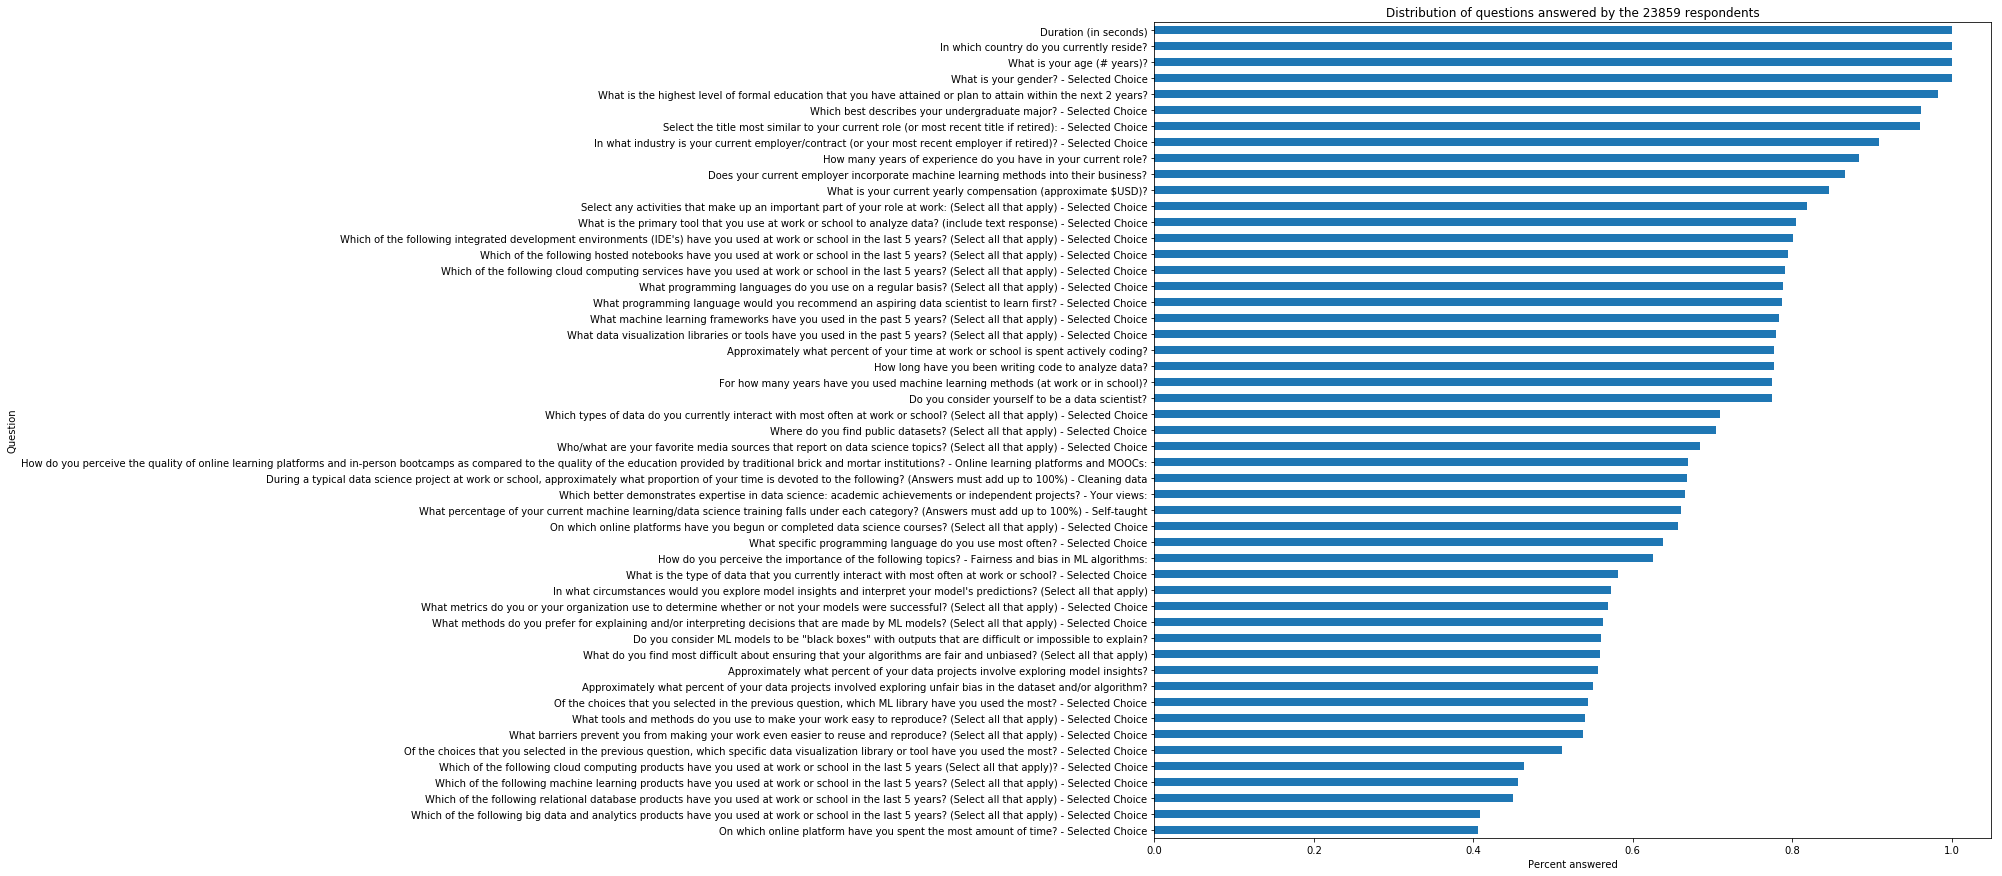

In [10]:
labels = queries_answered[['question', 'percent_answered']].sort_values(['percent_answered','question'], ascending=[True, False])['question']
idx = queries_answered[['question', 'percent_answered']].sort_values(['percent_answered','question'], ascending=[False, True]).index
fig = plt.figure()
queries_answered[['question', 'percent_answered']].sort_values(['percent_answered', 'question'],
                                                               ascending=[True, False]).plot(kind='barh', 
                                                                                    figsize=(15, 15),
                                                                                   legend=None)
plt.yticks(np.arange(len(idx)), labels)
plt.xlabel('Percent answered')
plt.ylabel('Question')
plt.title('Distribution of questions answered by the 23859 respondents')
plt.show()

<b>Survey duration statistics</b>

In [11]:
print('Minimum duration {} minutes \n \
      Maximum duration {} minutes\n \
      Mean duration {} minutes\n\
      Median duration {} minutes'. format(np.round(mult_choices['Duration (in seconds)'].min() / 60, 2),
                                           mult_choices['Duration (in seconds)'].max() / 60,
                                           np.round(mult_choices['Duration (in seconds)'].mean() / 60, 2),
                                           np.round(mult_choices['Duration (in seconds)'].median() / 60), 2))

Minimum duration 0.27 minutes 
       Maximum duration 14760.65 minutes
       Mean duration 201.88 minutes
      Median duration 17.0 minutes


Interesting! A respondent managed to complete <b>395</b>. questions in <code>27 seconds</code>. And, at the other extreme, 
it took one respondent <code>246 hours</code> or <code>10 days</code> to complete. That is some serious thinking respondent. The median duration is <code>17 minutes</code>

<b>Let us visualize the distribution of survey duration</b>

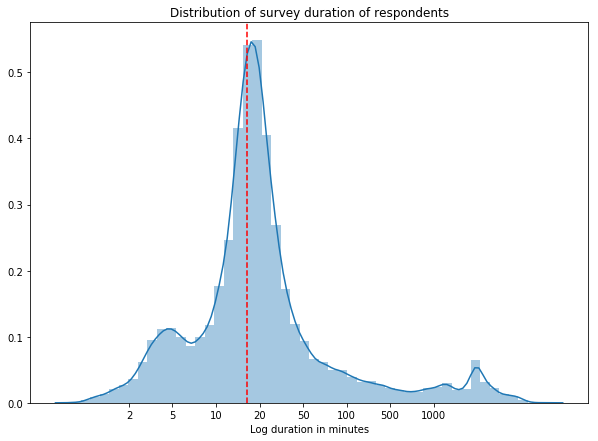

In [12]:
plt.figure(figsize=(10, 7))
log10_x_breaks = [2, 5, 10, 20, 50, 100, 500, 1000]
sns.distplot(np.log(mult_choices['Duration (in seconds)'] / 60), bins=50)
plt.xlabel('Log duration in minutes')
plt.title('Distribution of survey duration of respondents')
plt.xticks(np.arange(len(log10_x_breaks)), log10_x_breaks)
plt.axvline(x=np.log(15), color='red', linestyle='--')
plt.show()

The reported average duration is 15 minutes; the distribution shows 3 peaks. At the extremes, one group who managed to 
complete the survey in about 5 minutes. And, another group who took more than 1000 minutes to complete it

In [13]:
def count_plot(series1, figsize, color, xlabel, ylabel, title, labels, is_order = False, is_label=False):
    """
    Plot a count plot of a categorical variable
    Args: series1 - A Pandas series
          figsize - A tuple containing the width and height
          color - A string specifying the color of the bar
          xlabel - A string describing the x-axis
          ylabel - A string describing the y-axis
          title - A string describing the plot
          labels - A list of categories
          is_order - A boolean
          is_label - A boolean
    Returns: None
    """
    plt.figure(figsize=figsize)
    if is_label:
        series1 = pd.Categorical(series1, labels)
    if is_order:
        sns.countplot(y=series1, color=color, orient='v', order=series1.value_counts().index)
    else:
        sns.countplot(y=series1, color=color, orient='v')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

<b>Country-wise distribution</b>

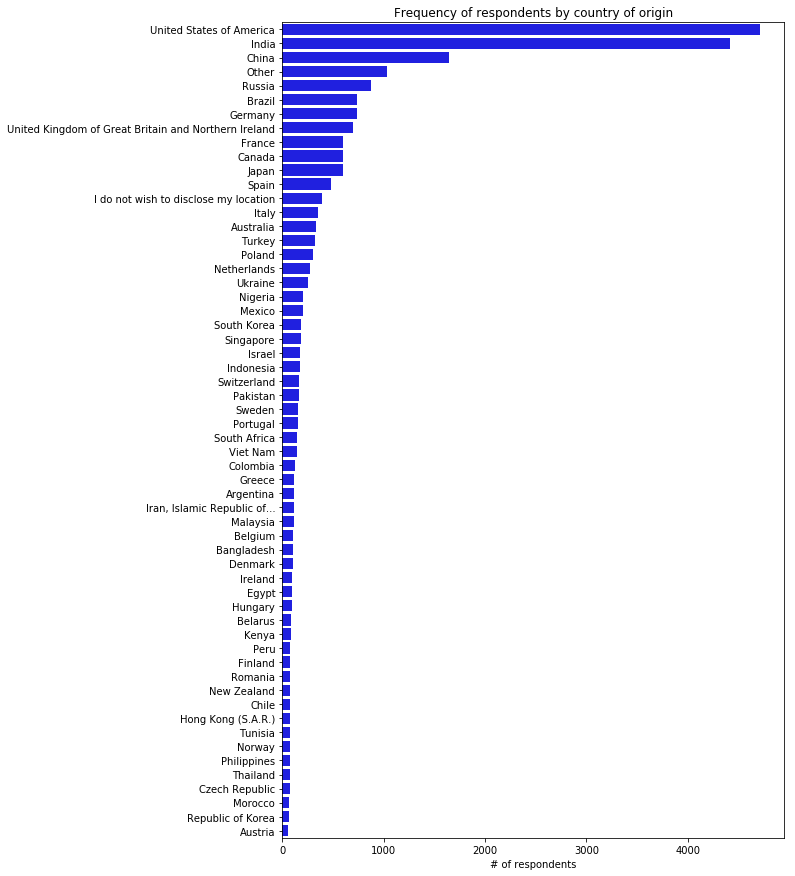

In [14]:
count_plot(mult_choices['In which country do you currently reside?'], (9, 15), 'blue', '# of respondents', '',
          'Frequency of respondents by country of origin', [], True, False)

The 'Other' category, according to Kaggle contains respondents who hail from countries that had less than 50 respondents. They were
grouped into the 'Other' category to protect their identities

<b>List the top countries that make up 80% of the respondents</b>

In [15]:
# filter 'Other' and 'I dont wish to to disclose my location' values
exclude_others_and_non_disclosures = mult_choices[(mult_choices['In which country do you currently reside?'] != 'Other') & 
                      (mult_choices['In which country do you currently reside?'] != 'I do not wish to disclose my location')]

In [16]:
# calculate the cumulative sum of respondents and filter the top 80%
tmp = pd.DataFrame(np.cumsum(exclude_others_and_non_disclosures['In which country do you currently reside?'].value_counts() / 
          len(exclude_others_and_non_disclosures)) < 0.8)
tmp[tmp['In which country do you currently reside?'] == 1].index.tolist()

['United States of America',
 'India',
 'China',
 'Russia',
 'Brazil',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'France',
 'Canada',
 'Japan',
 'Spain',
 'Italy',
 'Australia',
 'Turkey',
 'Poland',
 'Netherlands']

These top 16 countries, excluding <code>Other</code> and <code>I don't wish to disclose my location</code>, represent 80% of the respondents; the BRIC (Brazil, Russia, India, China) dominate the pack with the exclusion of South Africa

<b> Age distribution <b/>

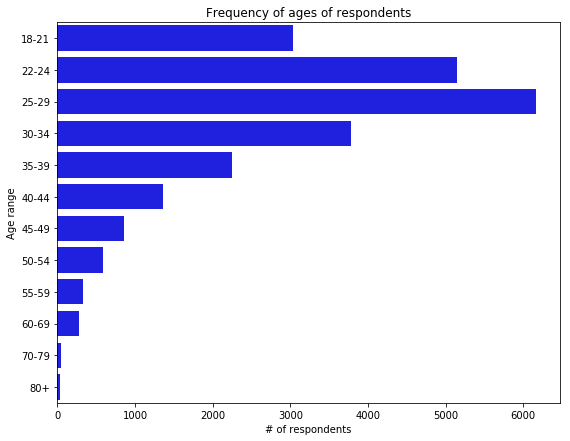

In [17]:
cust_sort = {'18-21': 1, '22-24': 2, '25-29': 3, '30-34': 4,
            '35-39': 5, '40-44': 6, '45-49': 7, '50-54': 8, 
            '55-59': 9, '60-69': 10, '70-79': 11, '80+': 12}
age_labels = [age_grp for age_grp, _ in sorted(cust_sort.items(), key=lambda x: x[1], reverse=False)]
count_plot(mult_choices['What is your age (# years)?'], (9, 7), 
           'blue', '# of respondents', 'Age range', 'Frequency of ages of respondents', 
           age_labels, False, True)


The median age range is <code>25-29 years</code>

<b>Gender distribution</b>

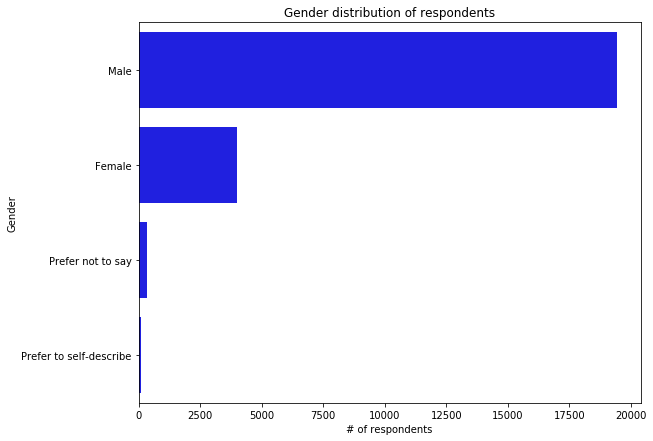

In [18]:
count_plot(mult_choices['What is your gender? - Selected Choice'], (9, 7), 
           'blue', '# of respondents', 'Gender', 'Gender distribution of respondents', 
           labels, True, False)

81% of the repondents are <code>male</code>.

In [19]:
def grouped_percentage(series1, series2, colnames, grp_label='age', filter_=False):
    """
    Compute the percentages for grouped data
    Args: series1 - A Pandas series
          series2 - A Pandas series
          colnames - A list of column names
          grp_label - A string label to group by
          filter_ - A boolean
    Returns: A dataframe with grouped percentages
    """
    subset = pd.DataFrame(list(zip(series1.values, series2.values)), columns=colnames)
    if filter_:
        subset = subset[subset['gender'].isin(['Male', 'Female'])]
    # https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
    subset = subset.groupby(colnames).size().groupby(grp_label).apply(lambda x: 100 * x/sum(x)).reset_index().rename(columns={0: "percentage"})
    return subset.pivot_table(index=grp_label, columns=colnames[1], values='percentage')

In [20]:
def grouped_plot(df, color, xlabel, title, figsize=(9, 7)):
    """
    Plot a stacked bar chart
    Args: df - A Pandas dataframe
          color - A list of colors
          xlabel - A string value describing the x-axis
          title - A string describing the plot
          figsize - A tuple of width and height
    Returns: None
    """
    fig = plt.figure()
    ax = fig.gca()
    df.plot(kind='bar', stacked=True, figsize=figsize, color=color, ax=ax)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=0)
    # https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas
    plt.legend(bbox_to_anchor=(1, 0.5))
    plt.grid('off')
    # https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
    ax.set_facecolor('white')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

<b>Percentage of gender by age ranges</b>

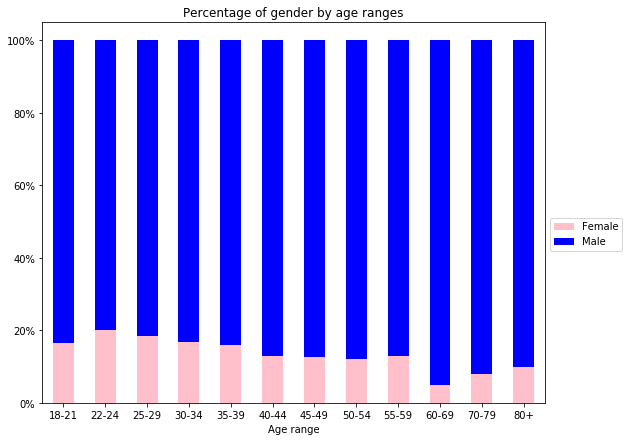

In [21]:
age_gender = grouped_percentage(mult_choices['What is your age (# years)?'], 
                   mult_choices['What is your gender? - Selected Choice'],
                  ['age', 'gender'], 'age', True)
grouped_plot(age_gender, ['pink', 'blue'], 'Age range', 'Percentage of gender by age ranges')

Across the age ranges, males dominate, which is evident because 81% of the respondents are male

<b>Percentage of age by the top 5 countries</b>

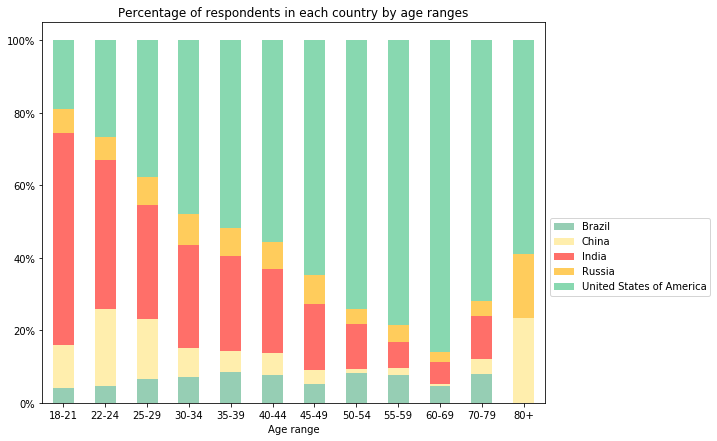

In [22]:
top5 = tmp[tmp['In which country do you currently reside?'] == 1].index.tolist()[:5]
series1 = mult_choices[mult_choices['In which country do you currently reside?'].isin(top5)]['What is your age (# years)?']
series2 = mult_choices[mult_choices['In which country do you currently reside?'].isin(top5)]['In which country do you currently reside?']
age_country = grouped_percentage(series1,
                                 series2,
                                 ['age', 'country'], 
                                 'age')
# https://digitalsynopsis.com/design/beautiful-color-palettes-combinations-schemes/
grouped_plot(age_country, ['#96ceb4', '#ffeead', '#ff6f69', '#ffcc5c', '#88d8b0'], 
             'Age range', 'Percentage of respondents in each country by age ranges')

There appears to be an inverse relationship, between the percentage of respondents within a bucket as the age range increases, between the 2 largest countries by total number of respondents

<b>What is the ratio of an Indian respodent to an American respondent in the 18-21 age bracket?</b>

In [23]:
ind_am = mult_choices[(mult_choices['What is your age (# years)?'] == '18-21') &
             (mult_choices['In which country do you currently reside?'].isin(['India', 'United States of America']))]['In which country do you currently reside?']
ind_am.value_counts()/len(ind_am)

India                       0.757108
United States of America    0.242892
Name: In which country do you currently reside?, dtype: float64

Every 3rd respondent out of the 4th respodent in the 18-21 category between India and America is an Indian

<b>What is the ratio of an Indian respodent to an American respondent in the 80+ age bracket?</b>

In [24]:
ind_am_70_79plus = mult_choices[(mult_choices['What is your age (# years)?'] == '70-79') &
             (mult_choices['In which country do you currently reside?'].isin(['India', 'United States of America']))]['In which country do you currently reside?']
ind_am_70_79plus.value_counts()/len(ind_am_70_79plus)

United States of America    0.857143
India                       0.142857
Name: In which country do you currently reside?, dtype: float64

Every 8 out of 10 respondents in the 70-79 category is an American

<b>Highest level of formal education distribution</b>

In [25]:
# replace NaN with missing
# replace long strings with short ones

mult_choices['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].fillna('Missing', inplace=True)
mult_choices['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].replace('Some college/university study without earning a bachelor’s degree', 'Some college/uni w/o degree', inplace=True)
mult_choices['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].replace('No formal education past high school', 'Up to high school', inplace=True)
mult_choices['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].replace('I prefer not to answer', 'No answer', inplace=True)

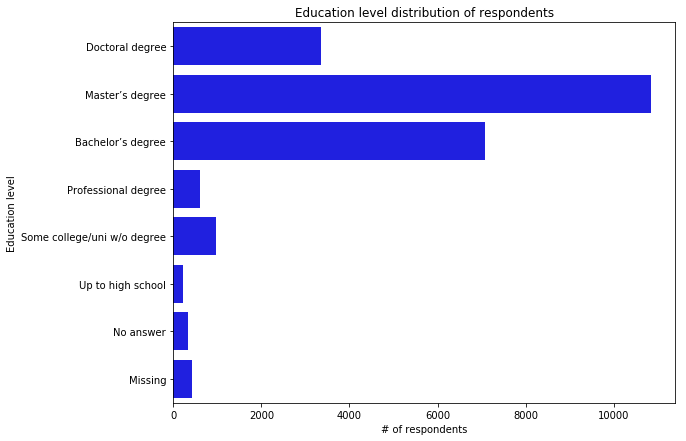

In [26]:
labels = ['Doctoral degree', "Master’s degree", "Bachelor’s degree", 
         'Professional degree', 'Some college/uni w/o degree', 
         'Up to high school', 'No answer', 'Missing']
count_plot(mult_choices['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], 
          (9, 7), 
           'blue', '# of respondents', 'Education level', 'Education level distribution of respondents', 
           labels, False, True)

45% of the respondents have a <code>Master's degree.</code>. Around 90% of the respondents have atleast a <code>Bachelor's degree</code> or higher

<b>Undergrad major distribution</b>

In [27]:
# replace NaN with missing
mult_choices['Which best describes your undergraduate major? - Selected Choice'].fillna('Missing', inplace=True)

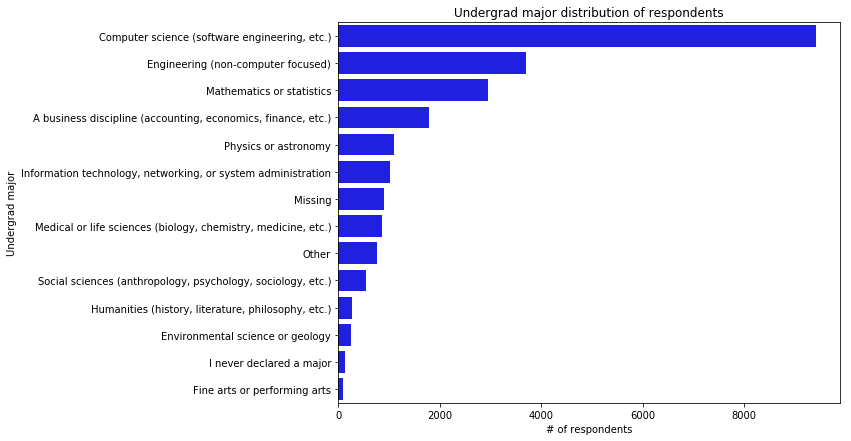

In [28]:
count_plot(mult_choices['Which best describes your undergraduate major? - Selected Choice'], 
          (9, 7), 
           'blue', '# of respondents', 'Undergrad major', 'Undergrad major distribution of respondents', 
           labels, True, False)

40% of the respondents have a major in <code>Computer science</code>. About 68% of the respondents have either majored or are  majoring in subjects that are
strongly favoured in the Data science community

<b>Distribution of number of years of work experience</b>

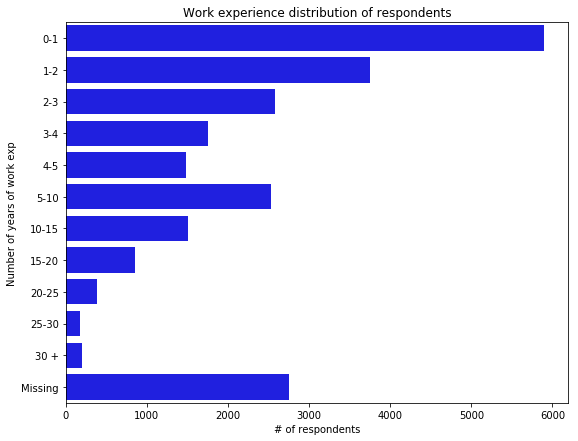

In [29]:
work_labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30','30 +', 'Missing']
# replace NaN with Missing
mult_choices['How many years of experience do you have in your current role?'].fillna('Missing', inplace=True)
count_plot(mult_choices['How many years of experience do you have in your current role?'], 
          (9, 7), 
           'blue', '# of respondents', 'Number of years of work exp', 'Work experience distribution of respondents', 
           work_labels, False, True)

<b>Distribution of amount of time spent coding at work</b>

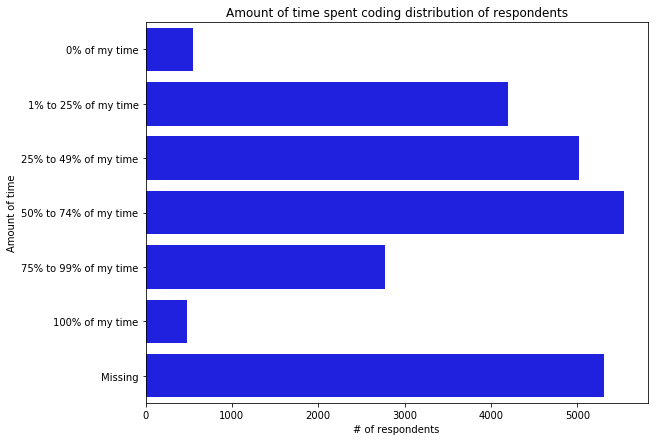

In [30]:
pct_coding_labels = ['0% of my time', '1% to 25% of my time', '25% to 49% of my time', 
                    '50% to 74% of my time', '75% to 99% of my time', '100% of my time', 'Missing']
work_labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30','30 +', 'Missing']
# replace NaN with Missing
mult_choices['Approximately what percent of your time at work or school is spent actively coding?'].fillna('Missing', inplace=True)
count_plot(mult_choices['Approximately what percent of your time at work or school is spent actively coding?'], 
          (9, 7), 
           'blue', '# of respondents', 'Amount of time', 'Amount of time spent coding distribution of respondents', 
           pct_coding_labels, False, True)

<b>Distribution of number of years of coding experience</b>

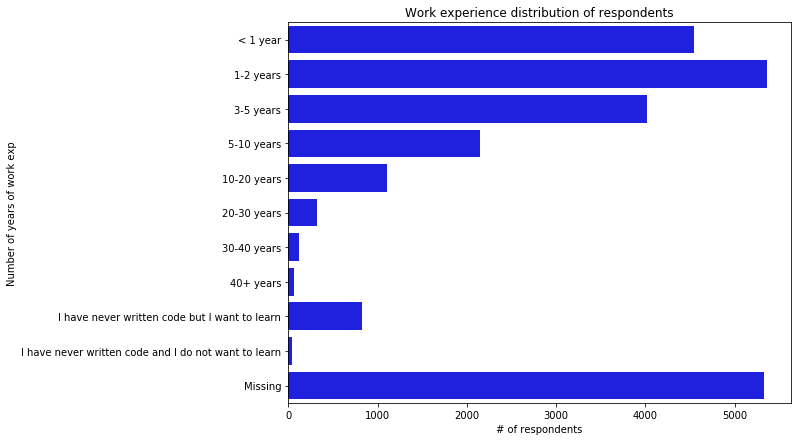

In [31]:
work_exp_labels = ['< 1 year', '1-2 years', '3-5 years', '5-10 years', 
               '10-20 years', '20-30 years', '30-40 years', '40+ years', 
               'I have never written code but I want to learn', 
               'I have never written code and I do not want to learn',
               'Missing']
# replace NaN with Missing
mult_choices['How long have you been writing code to analyze data?'].fillna('Missing', inplace=True)
count_plot(mult_choices['How long have you been writing code to analyze data?'], 
          (9, 7), 
           'blue', '# of respondents', 'Number of years of work exp', 'Work experience distribution of respondents', 
           work_exp_labels, False, True)

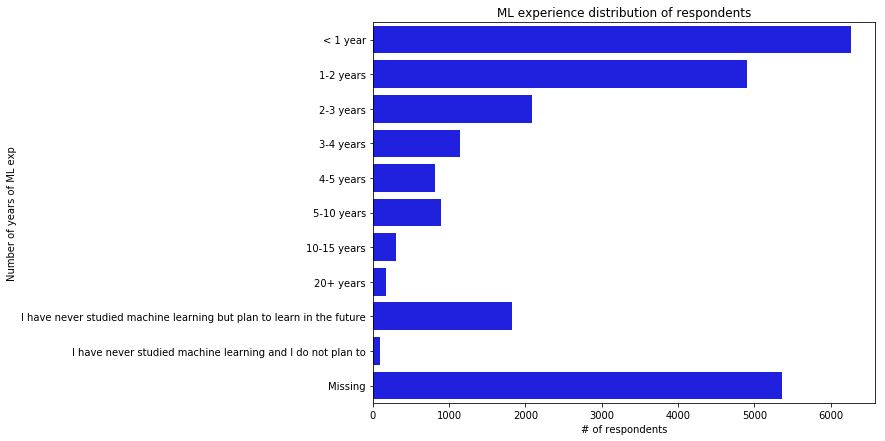

In [32]:
ml_exp = ['< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', 
           '5-10 years', '10-15 years', '20+ years', 
           'I have never studied machine learning but plan to learn in the future', 
           'I have never studied machine learning and I do not plan to', 
           'Missing']
# replace NaN with Missing
mult_choices['For how many years have you used machine learning methods (at work or in school)?'].fillna('Missing', inplace=True)
count_plot(mult_choices['For how many years have you used machine learning methods (at work or in school)?'], 
          (9, 7), 
           'blue', '# of respondents', 'Number of years of ML exp', 'ML experience distribution of respondents', 
           ml_exp, False, True)

In [33]:
mult_choices['For how many years have you used machine learning methods (at work or in school)?'].value_counts(dropna=False)

< 1 year                                                                 6271
Missing                                                                  5368
1-2 years                                                                4908
2-3 years                                                                2088
I have never studied machine learning but plan to learn in the future    1828
3-4 years                                                                1140
5-10 years                                                                895
4-5 years                                                                 810
10-15 years                                                               298
20+ years                                                                 167
I have never studied machine learning and I do not plan to                 86
Name: For how many years have you used machine learning methods (at work or in school)?, dtype: int64

<b>Facet top 5 undergrad majors by highest education</b>

In [34]:
def multi_bar_plots(df, facet, colname1, colname2, labels, xlabels, r, c, cust_order=False, 
                    fig_name=None, save_fig=False, path='./img'):
    """
    Create multiple bar plots
    Args: df - A Pandas dataframe
          facet - A list of categories to facet the plot
          colname1 - A string containing the name of the column whose
          values appear on the x-axis
          colname2 - A string containing the name of the column to facet
          labels - A list of categories that represent colname2
          xlabels - A list of cateogries that represent colname1
          r - An integer specifying number of rows
          c - An integer specifying number of columns
          fig_name - A string specifying the name of the plot
          cust_order - A boolean to decide whether to custom sort or not
          save_fig - A boolean to decide whether to save the plot or not
          path - A string containing the directory to store the output
    Returns: None      
    """
    if cust_order:
        # sort this series only one
        df[colname1] = pd.Categorical(df[colname1], labels)
    for p, val in enumerate(facet):
        # https://stackoverflow.com/questions/13838405/custom-sorting-in-pandas-dataframe
        ax = plt.subplot(r, c, p+1)
        if len(xlabels) != 0:
            df = df[df[colname1].isin(xlabels)] 
        if cust_order:
            # idx = df[df[colname2] == val].sort_values(colname1).index
            #labels = df[df[colname2] == val].sort_values(colname1)[colname1]
            # df[df[colname2] == val].sort_values(colname1).plot(kind='barh', legend=None, ax=ax, figsize=(12, 9))
            df_plot = pd.DataFrame(100* df[df[colname2] == val][colname1].value_counts()/
            len(df[df[colname2] == val])).reset_index().rename(columns={colname1: 'percent', 'index': colname1}).sort_values(colname1)
            df_plot.plot(kind='barh', legend=None, ax=ax, figsize=(12, 9))
            labels = df_plot.sort_values(colname1)[colname1]
        else:
            # perform ordering by count
            # df[df[colname2] == val].sort_values('count', ascending=False).plot(kind='barh', legend=None, ax=ax, figsize=(12, 9))
            df_plot = pd.DataFrame(100* df[df[colname2] == val][colname1].value_counts()/
            len(df[df[colname2] == val])).reset_index().rename(columns={colname1: 'percent', 'index': colname1}).sort_values('percent', ascending=False)
            df_plot.plot(kind='barh', legend=None, ax=ax, figsize=(12, 9))

        plt.title(val)
        plt.yticks(np.arange(len(labels)), labels)
        # https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    plt.tight_layout()
    if save_fig:
        plt.savefig(os.path.join(path, fig_name), bbox_inches='tight')
    plt.show()

In [35]:
top5_majors = mult_choices['Which best describes your undergraduate major? - Selected Choice'].value_counts(dropna=False)[:5].index
subset = pd.DataFrame()
subset['highest_education'] = mult_choices[mult_choices['Which best describes your undergraduate major? - Selected Choice'].isin(top5_majors)]['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']
subset['undergrad_major'] = mult_choices[mult_choices['Which best describes your undergraduate major? - Selected Choice'].isin(top5_majors)]['Which best describes your undergraduate major? - Selected Choice']

subset.rename(columns={'Which best describes your undergraduate major? - Selected Choice': 'undergrad_major',
                      'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'highest_education'}, inplace=True)
# subset = subset.groupby(['undergrad_major','highest_education']).size().reset_index().rename(columns={0: 'count'})
# sns.catplot('highest_education',
#            col='undergrad_major',
#            col_wrap=4,
#            data=subset,
#            kind='count',
#            height=2.5, aspect=.8)
# nrows=3
# ncols=2
# fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(16, 10))
# for i in range(nrows):
#     for j in range(ncols):
#         axes = axs[i//6, j%6]
#         subset.plot(ax=axes, kind='barh', legend=None, color='blue', sharey=True)
#         axes.set_yticks(np.arange(len(ed_labels)), ed_labels)
# plt.tight_layout()
# plt.show()
#plt.figure(figsize=(16, 10))

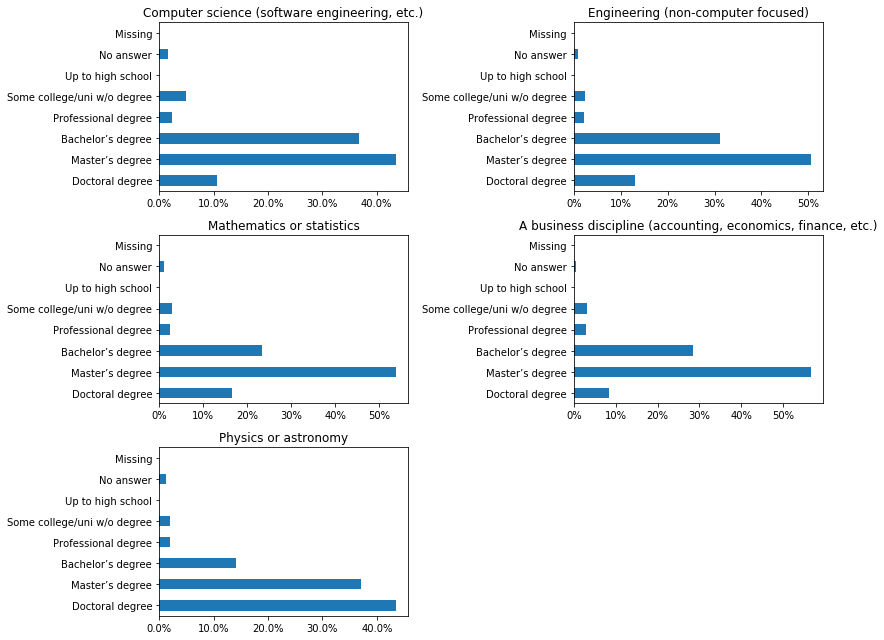

In [36]:
ed_labels = ['Doctoral degree', "Master’s degree", "Bachelor’s degree", 
         'Professional degree', 'Some college/uni w/o degree', 
         'Up to high school', 'No answer', 'Missing']
multi_bar_plots(subset, top5_majors, 'highest_education', 'undergrad_major', 
               ed_labels, [], 3, 2, True)

Except in the <code>Physics or astronomy</code> major where nearly 45% or 500 respondents are Doctoral degree pursuers, in the rest of the majors
Master's degree is the most common

<b>Facet top 5 industries majors by top 8 role titles</b>

Filtered our NaN, Other, Not employed role titles

In [37]:
mult_choices.rename(columns=
                   {'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice': 'Industry'}, inplace=True)
top5_industries = mult_choices[(mult_choices['Industry'].notnull()) & (mult_choices['Industry'] != 'Other')]['Industry'].value_counts()[:5].index
mult_choices.rename(columns=
                   {'Select the title most similar to your current role (or most recent title if retired): - Selected Choice': 'Role_title'}, inplace=True)
top8_role_titles = mult_choices[(mult_choices['Role_title'].notnull()) & (mult_choices['Role_title'] != 'Other') & (mult_choices['Role_title'] != 'Not employed')]['Role_title'].value_counts()[:8].index
subset = pd.DataFrame()
subset[['industry', 'role_title']] = mult_choices[(mult_choices['Industry'].isin(top5_industries)) & (mult_choices['Role_title'].isin(top8_role_titles))][['Industry', 'Role_title']]
# subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
# subset = subset.groupby(['role_title', 'industry']).size().reset_index().rename(columns={0: 'count'})

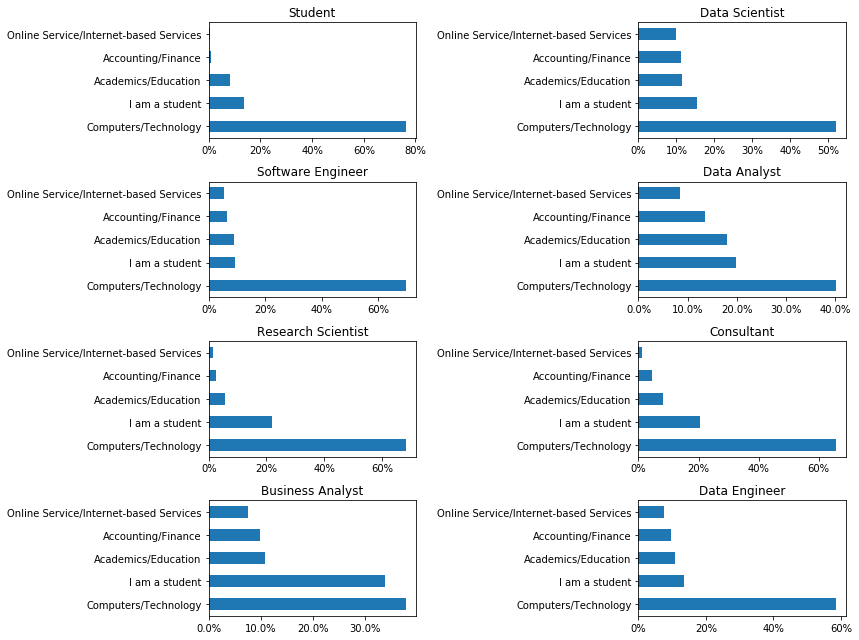

In [38]:
multi_bar_plots(subset, top8_role_titles, 'industry', 'role_title',
               top5_industries, [], 4, 2)

Due to the design in the nature of the survey, it appears that the designers have failed to create branching questions. Example -
if the respondent is a student then he/she shouldn't have seen the question on <code>In what industry is your 
current employer/contract (or your most recent employer if retired)? - Selected Choice</code>; Clearly in what country, do you have an <code>Industry</code> called <code>I am a student</code>?

To make the analysis more meaningful, it would be better to filter out both the <code>Role title</code> of "Student" and <code>Industry</code> of "I am a student"

Despite the discrepancy, The <code>Computers/Technology</code> industry has the most number of respondents

<b>Do you consider yourself to be a Data scientist faceted by top8 role titles</b>

In [39]:
# replace NaN with missing
subset = pd.DataFrame()
subset['are_you_a_ds'] = mult_choices['Do you consider yourself to be a data scientist?'].fillna('Missing')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', 'are_you_a_ds']).size().reset_index().rename(columns={0: 'count'})

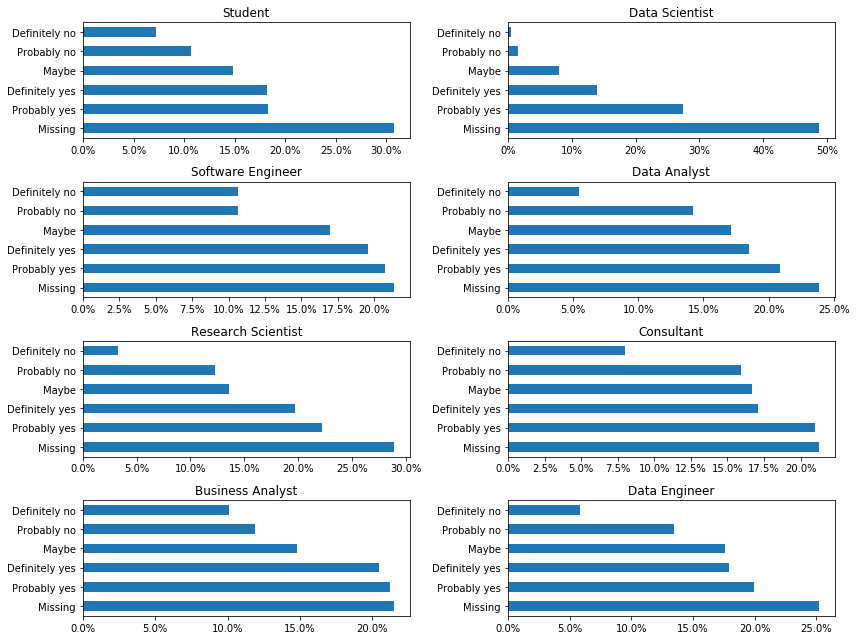

In [40]:
ds_labels = ['Missing', 'Probably yes', 'Definitely yes',
            'Maybe', 'Probably no', 'Definitely no']
multi_bar_plots(subset, top8_role_titles, 'are_you_a_ds', 'role_title',
               ds_labels, [], 4, 2)

Within the top 8 <code>role titles</code> there appears to be a lot of uncertainty in whether the respondent is a Data scientist or not; this is
understandable given that there is no universal definition of who/what is a Data scientist?

<b>What activities do the respondents perform at work</b>

In [41]:
# In the data this particular question is split into 8 columns
# Replace NaN with Missing
activity_queries = [s for s in mult_choices.columns.tolist() if 'Select any activities that make up an important part of your role at work' in s ][:6]
activities_performed = pd.Series(mult_choices[activity_queries].values.ravel()).fillna('Missing')

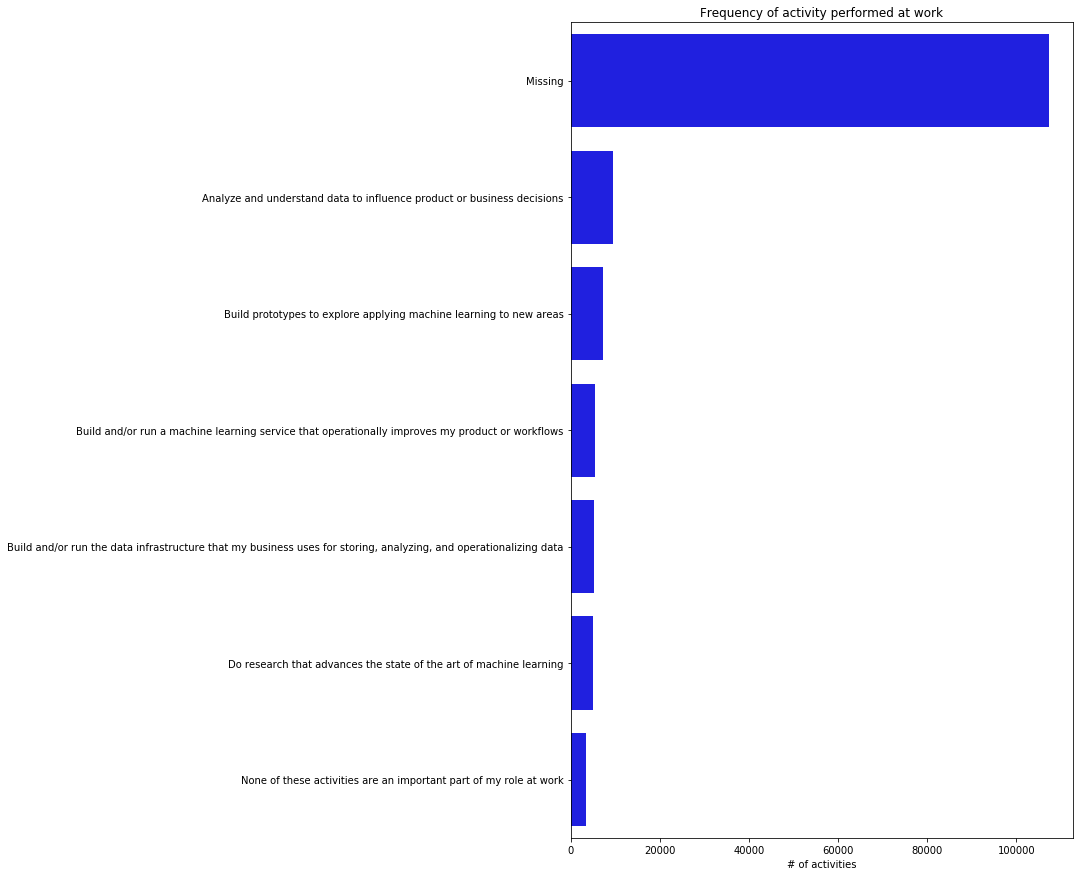

In [42]:
count_plot(activities_performed, (9, 15), 'blue', '# of activities', '',
          'Frequency of activity performed at work', [], True, False)

It is pretty evident that most of the respondents don't perform 1 or more of the 5 activities; the respondent could have selected
the last option <code>None of these activities are an important part of my role at work</code>

Given that the definition of <code>Data Scientist</code> is vague; this is helpful in determining if the respondent is indeed a Data scientist or not

<b>Role titles faceted by top 5 activities performed</b>

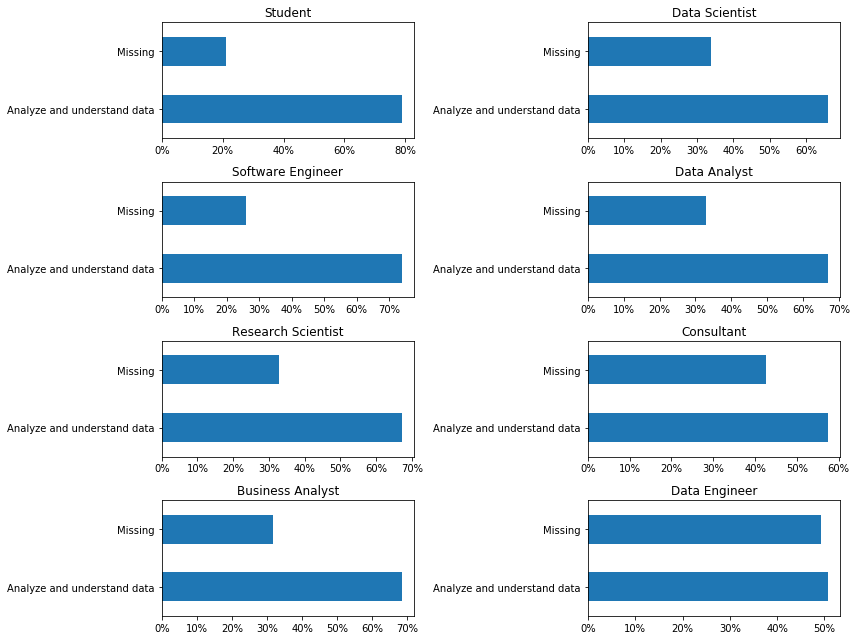

In [43]:
activities = ['Analyze and understand data to influence product or business decisions',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Missing',
       'Do research that advances the state of the art of machine learning',
       'None of these activities are an important part of my role at work',
       'Build prototypes to explore applying machine learning to new areas']
questions = activity_queries
subset = pd.DataFrame()
subset[questions[0]] = mult_choices[questions[0]].fillna('Missing')
#subset[questions[0]] = mult_choices[questions[0]].replace('Analyze and understand data to influence product or business decisions', 
#                                                         'Analyze and understand data')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', questions[0]]).size().reset_index().rename(columns={0: 'count'})
multi_bar_plots(subset, top8_role_titles, questions[0], 'role_title',
               ['Analyze and understand data', 'Missing'], 
                [],
                4, 2)

It appears that the top 4 <code>role titles</code> that analyze data in their daily work based on the frequency of responses: <code>Student</code>,
<code>Software engineer</code>, <code>Data scientist</code>, and <code>Data analyst</code>. Further, in the <code>Data engineer</code> caetgory, there are almost an equal number of respondents who analyze data versus those who didn't respond to this question prompt   

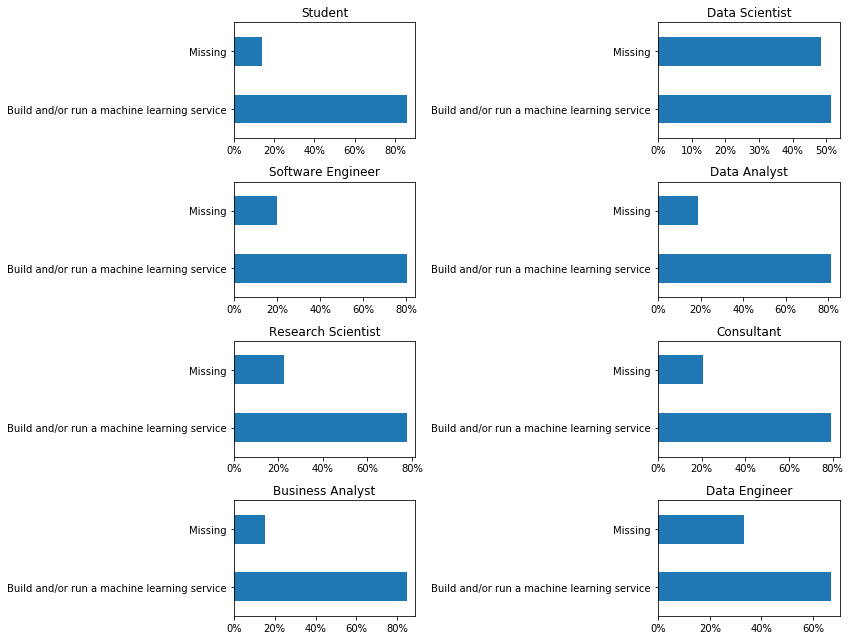

In [44]:
subset = pd.DataFrame()
subset[questions[1]] = mult_choices[questions[1]].fillna('Missing')
#subset[questions[0]] = mult_choices[questions[0]].replace('Analyze and understand data to influence product or business decisions', 
#                                                         'Analyze and understand data')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', questions[1]]).size().reset_index().rename(columns={0: 'count'})
multi_bar_plots(subset, top8_role_titles, questions[1], 'role_title',
               ['Build and/or run a machine learning service', 'Missing'], 
                [],
                4, 2)

It is interesting to note that there are almost an equal number of respondents in the <code>Data scientist</code> category
who didn't answer this question

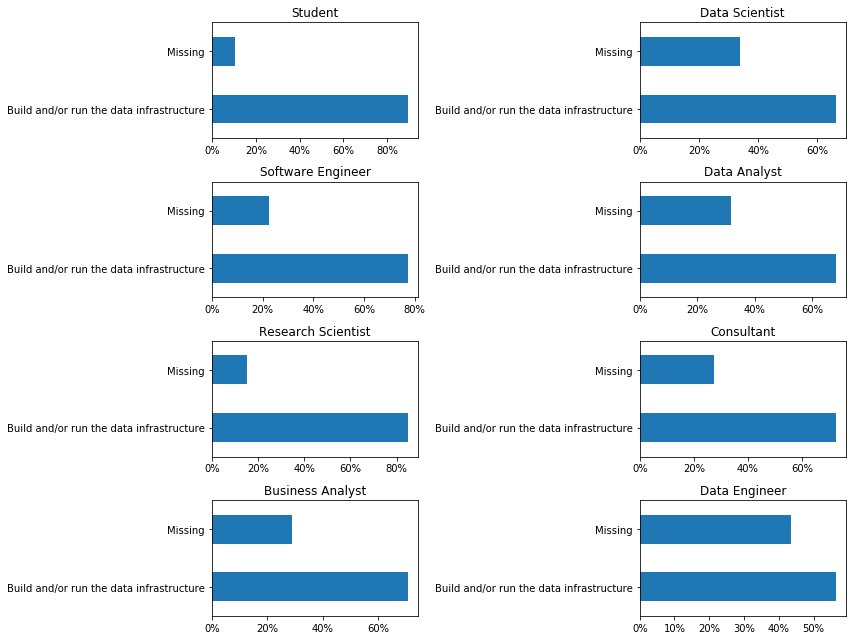

In [45]:
subset = pd.DataFrame()
subset[questions[2]] = mult_choices[questions[2]].fillna('Missing')
#subset[questions[0]] = mult_choices[questions[0]].replace('Analyze and understand data to influence product or business decisions', 
#                                                         'Analyze and understand data')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', questions[2]]).size().reset_index().rename(columns={0: 'count'})
multi_bar_plots(subset, top8_role_titles, questions[2], 'role_title',
               ['Build and/or run the data infrastructure', 'Missing'], 
                [],
                4, 2)

<code>Student</code> category responses seems strong for this question, which begs the question - Are these students doing this
as part of their research and/or part-time work?

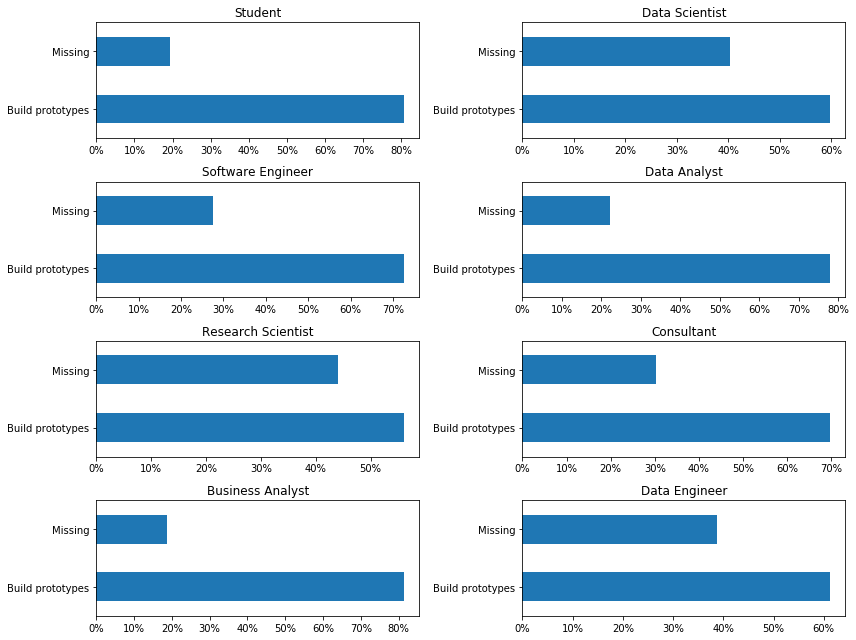

In [46]:
subset = pd.DataFrame()
subset[questions[3]] = mult_choices[questions[3]].fillna('Missing')
#subset[questions[0]] = mult_choices[questions[0]].replace('Analyze and understand data to influence product or business decisions', 
#                                                         'Analyze and understand data')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', questions[3]]).size().reset_index().rename(columns={0: 'count'})
multi_bar_plots(subset, top8_role_titles, questions[3], 'role_title',
               ['Build prototypes', 'Missing'], 
                [],
                4, 2)

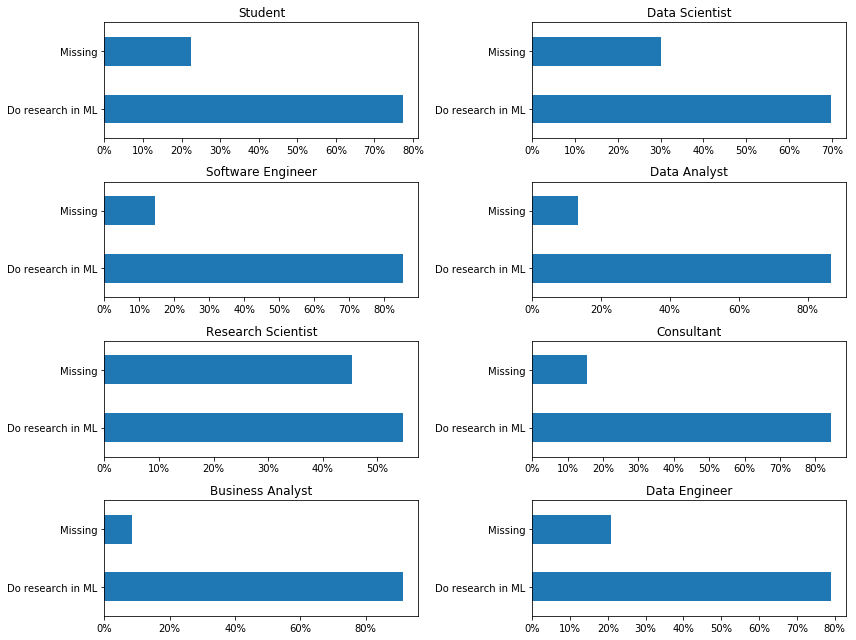

In [47]:
subset = pd.DataFrame()
subset[questions[4]] = mult_choices[questions[4]].fillna('Missing')
#subset[questions[0]] = mult_choices[questions[0]].replace('Analyze and understand data to influence product or business decisions', 
#                                                         'Analyze and understand data')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', questions[4]]).size().reset_index().rename(columns={0: 'count'})
multi_bar_plots(subset, top8_role_titles, questions[4], 'role_title',
               ['Do research in ML', 'Missing'], 
                [],
                4, 2)

Apparently, <code>Research scientist's</code> in this survey didn't feel the need to mention whether he/she does research to 
advance the field of ML. More than 500 respondents ignored the prompt

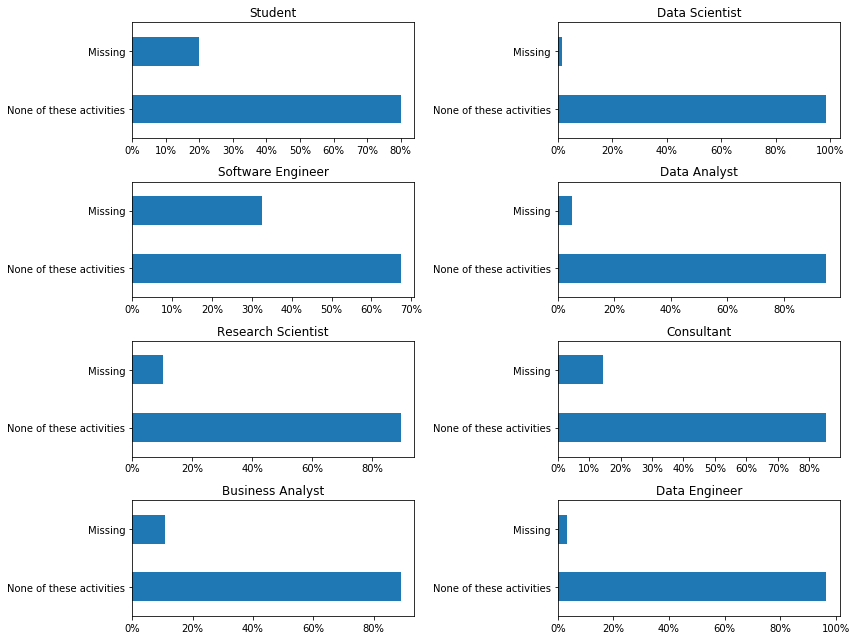

In [48]:
subset = pd.DataFrame()
subset[questions[5]] = mult_choices[questions[5]].fillna('Missing')
#subset[questions[0]] = mult_choices[questions[0]].replace('Analyze and understand data to influence product or business decisions', 
#                                                         'Analyze and understand data')
subset['role_title'] = mult_choices[mult_choices['Role_title'].isin(top8_role_titles)]['Role_title']
#subset = subset.groupby(['role_title', questions[5]]).size().reset_index().rename(columns={0: 'count'})
multi_bar_plots(subset, top8_role_titles, questions[5], 'role_title',
               ['None of these activities', 'Missing'], 
                [],
                4, 2)

About 1% of the respondents with <code>role_title</code> of <code>Data scientist</code> perform none of the activities associated with being
a data scientist, which can be treated as an anamoly

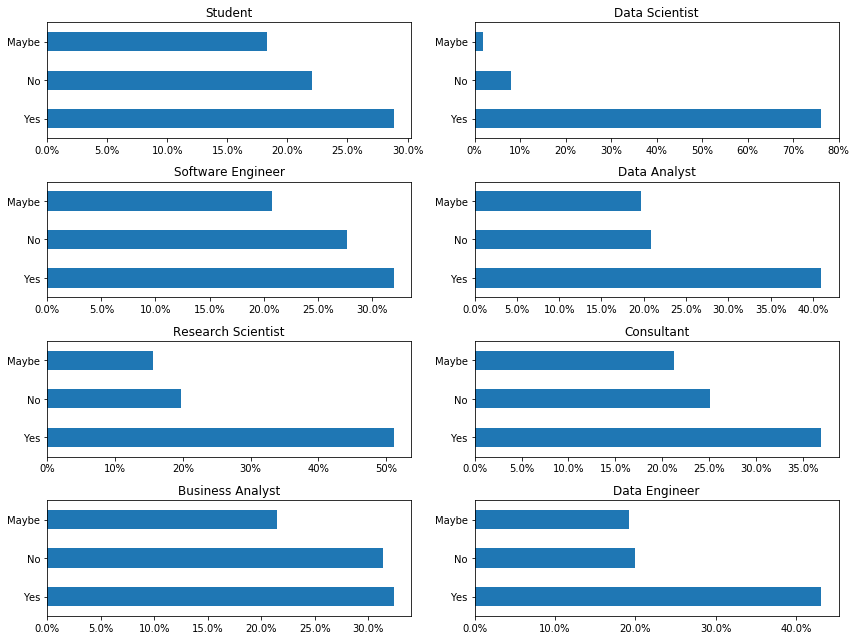

In [49]:
subset = pd.DataFrame()
subset[['role_title', 'are_you_a_ds']] = mult_choices.loc[mult_choices['Role_title'].isin(top8_role_titles), ['Role_title', 'Do you consider yourself to be a data scientist?']]
# subset['are_you_a_ds'] = mult_choices['Do you consider yourself to be a data scientist?']
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably not', 'No')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely not', 'No')
#subset['are_you_a_ds'] = subset['are_you_a_ds'].replace(np.nan, 'Missing')
subset['are_you_a_ds'].dropna(inplace=True)

multi_bar_plots(subset, top8_role_titles, 'are_you_a_ds', 'role_title',
               ['Yes', 'No', 'Maybe'], 
                [],
                4, 2, False, 'data_scientist_role_tile_and_are_you_a_ds.png', True)

It appears that only a small percentage of <code>Data scientists</code> are uncertain about being actual data scientists; it is
also interesting to note that among the remaining 7 roles, respondents appear to believe that they are performing the tasks of a
data scientist

<b>Top 5 programming languages used by respondents who answered the question: Are you a Data scientist?</b>

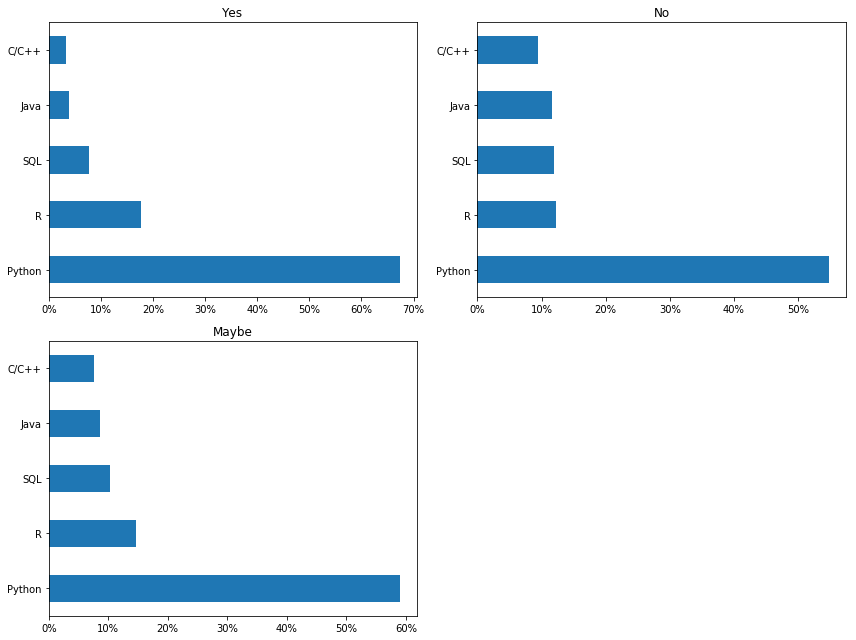

In [50]:
subset = pd.DataFrame()
top5_programminglanguages = mult_choices['What specific programming language do you use most often? - Selected Choice'].dropna().value_counts(dropna=False).index[:5] 
subset[['program_language', 'are_you_a_ds']] = mult_choices.loc[mult_choices['What specific programming language do you use most often? - Selected Choice'].isin(top5_programminglanguages), 
                                                                ['What specific programming language do you use most often? - Selected Choice', 'Do you consider yourself to be a data scientist?']]
# subset['are_you_a_ds'] = mult_choices['Do you consider yourself to be a data scientist?']
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably not', 'No')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely not', 'No')
#subset['are_you_a_ds'] = subset['are_you_a_ds'].replace(np.nan, 'Missing')
subset['are_you_a_ds'].reset_index().dropna(inplace=True)

multi_bar_plots(subset, ['Yes', 'No', 'Maybe'], 'program_language', 'are_you_a_ds',
               top5_programminglanguages, 
                [],
                2, 2, False, 'program_language_and_are_you_a_ds.png', True)
#mult_choices['What specific programming language do you use most often? - Selected Choice'].value_counts()

<b>How much time does someone who claims to be a Data scientist spend on coding</b>

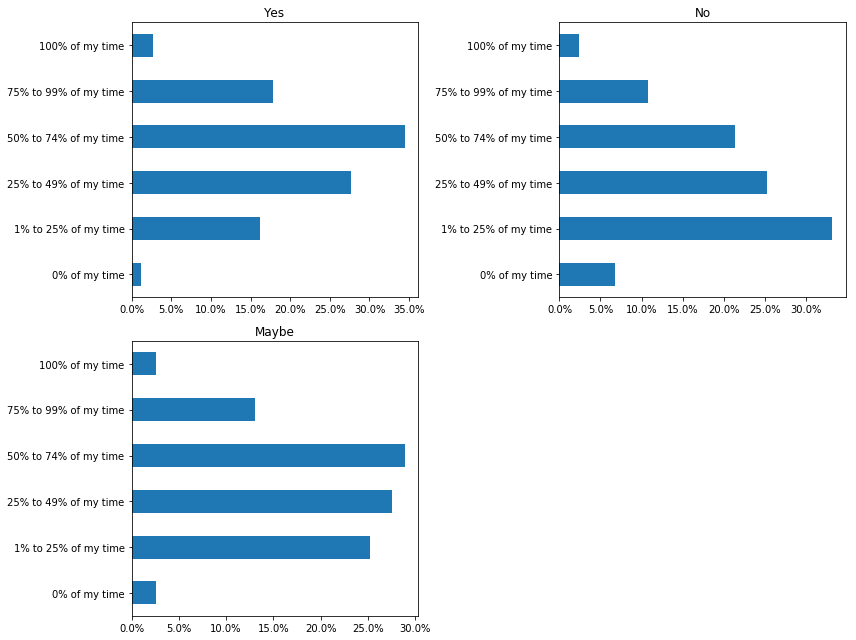

In [51]:
subset = pd.DataFrame()
subset['time_spent_coding'] = mult_choices['Approximately what percent of your time at work or school is spent actively coding?']
subset['are_you_a_ds'] = mult_choices['Do you consider yourself to be a data scientist?']
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably not', 'No')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely not', 'No')
subset.dropna(inplace=True)
xlabels = ['0% of my time', '1% to 25% of my time', '25% to 49% of my time', 
           '50% to 74% of my time', '75% to 99% of my time',
       '100% of my time']
multi_bar_plots(subset, ['Yes', 'No', 'Maybe'], 'time_spent_coding', 'are_you_a_ds',
               xlabels, 
                [],
                2, 2, True)

In the <code>No</code> category, above 0%, we see a decline in time spent coding, which lends some support to the claim that
the respondent believes he/she might not be a Data scientist

<b>Which are the most frequently used ML libraries for somebody who claims to be a Data scientist</b>

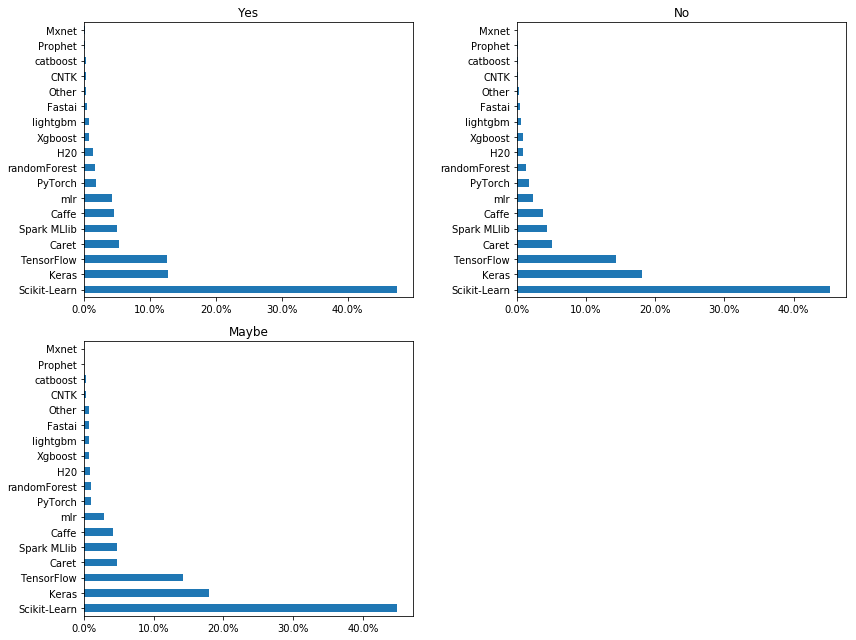

In [52]:
subset = pd.DataFrame()
subset['ml_library_used'] = mult_choices['Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice']
subset['are_you_a_ds'] = mult_choices['Do you consider yourself to be a data scientist?']
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably yes', 'Yes')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Probably not', 'No')
subset['are_you_a_ds'] = subset['are_you_a_ds'].replace('Definitely not', 'No')
subset.dropna(inplace=True)
xlabels = subset['ml_library_used'].unique().tolist()
multi_bar_plots(subset, ['Yes', 'No', 'Maybe'], 'ml_library_used', 'are_you_a_ds',
               xlabels, 
                [],
                2, 2, False, 'ml_libraries_used_and_are_you_a_ds.png', True)
#mult_choices['Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice'].value_counts()

<b>Prepare data for Sankey chart</b>

In [53]:
def data_for_sankey(df, queries, colnames, replace_cols, 
                    apply_cols, transform_cols, 
                    is_replace=False, is_apply=False, is_transform=False, is_activity=False):
    """
    Prepare subset of data based on queries for sankey chart
    Args: df - A Pandas dataframe
          queries - A list of queries
          colnames - A list of column names
          replace_cols - A list of tuples consisting of colname, value to repalce, and
          new value
          apply_cols - A list of tuples consisting of colname, and list of labels, and
          new value
          is_replace - A boolean to decide whether to replace the label or not
          is_apply - A boolean to decide whether to apply a function or not
          is_transform - A boolean to decide whether to transform the data or not
          is_activity - A boolean to decide whether to dropna(). For activities queries
          it returns no records
    Returns - A new df
    """
    sankey = df[queries].copy(deep=True)
    sankey = sankey.rename(columns=dict(zip(queries, colnames)))
    if not is_activity:
        sankey.dropna(inplace=True)
    if is_replace:
        for col, old_val, new_val in replace_cols:
            sankey[col] = sankey[col].replace(old_val, new_val)
    if is_apply:
        for col, labels, new_val in apply_cols:
            sankey[col] = sankey[col].apply(lambda x: new_val if x not in labels else x)
    if is_transform:
        for col in transform_cols:
            sankey[col] = sankey[col].apply(transform_ds_values)
    return sankey.dropna() if not is_activity else sankey

In [54]:
def transform_ds_values(row):
    """
    Perform transformation on the values for Q
    Do you consider yourself a Data Scientist?
    """
    if row in ('Definitely yes', 'Probably yes'):
        return 'Yes'
    elif row in ('Definitely not', 'Probably not'):
        return 'No'
    elif row == 'Maybe':
        return 'Maybe'

In [55]:
demographic_sankey = data_for_sankey(mult_choices, ['In which country do you currently reside?', 
            'What is your age (# years)?', 
            'Role_title',
            'Do you consider yourself to be a data scientist?', 
            'What is your gender? - Selected Choice',
            'What is your current yearly compensation (approximate $USD)?'],
                   ['country', 'age', 'role_title', 'are_you_a_ds', 'gender', 'annual_salary'],
                   [('country', 'United States of America', 'USA'),
                   ('annual_salary', 'I do not wish to disclose my approximate yearly compensation', 'Undisclosed')],
                   [('country', ['USA', 'India', 'Russia', 'China', 'Brazil'], 'Rest of the world'), 
                   ('age', ['18-21', '22-24', '25-29', '30-34', '35-39'], '40+'), 
                    ('role_title', top8_role_titles, 'Other title')], 
                   ['are_you_a_ds'], True, True, True)

In [56]:
d3_path = r'./d3_input'
demographic_sankey.to_csv(os.path.join(d3_path, 'kaggle_survey_demographic_data.csv'), index=False)

In [97]:
def show_kaggle_demographic_data(filename, path='./img' ):
    """
    Display D3 Sankey diagram
    """
    # https://stackoverflow.com/questions/30334385/display-svg-in-ipython-notebook-from-a-function
    return SVG(filename=os.path.join(path, filename))

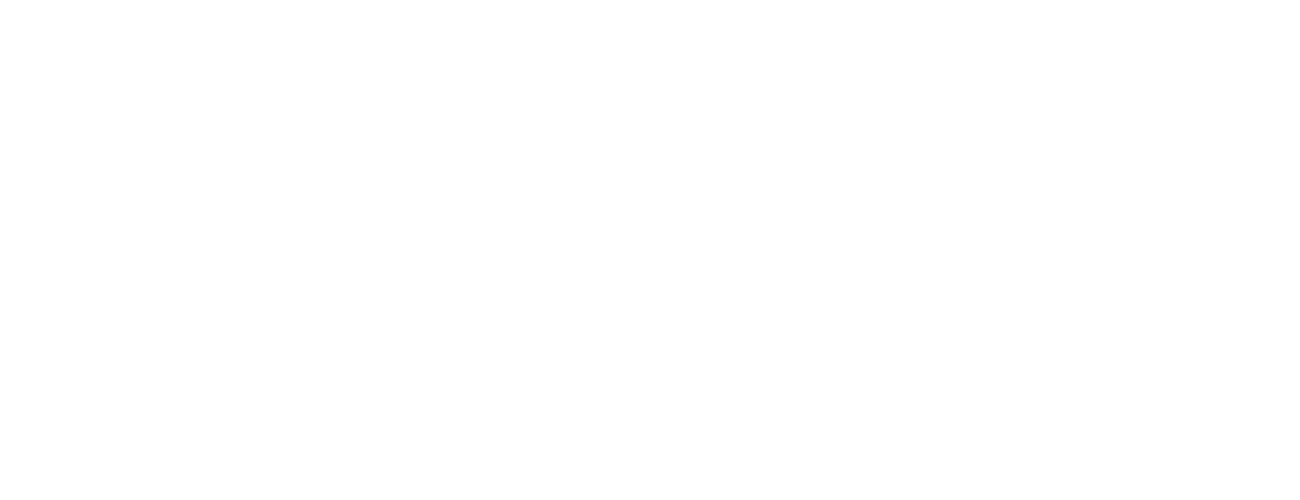

In [100]:
filename = "respondent-demographic-data-kaggle-survey-2018.svg"
show_kaggle_demographic_data(filename)

In [59]:
queries = ['Do you consider yourself to be a data scientist?', 
            'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 
            'Which best describes your undergraduate major? - Selected Choice',
            'How many years of experience do you have in your current role?', 
            'How long have you been writing code to analyze data?',
            'Approximately what percent of your time at work or school is spent actively coding?']
colnames = ['are_you_a_ds', 'education', 'undergrad_major', 'work_exp_years', 
           'num_years_coding', 'percent_spent_coding']
top3_degrees = ['Doctoral degree', "Master’s degree", "Bachelor’s degree"]
top5_majors = ['Computer science', 'Engineering', 'Business discipline', 
               'Mathematics or statistics', 'Physics or astronomy']
top_work_exp = ['0-1', '1-2', '2-3', '3-4', '4-5']
pct_coding = ['0% of my time', '1% to 25% of my time', '25% to 49% of my time', 
                    '50% to 74% of my time']
num_yrs_coding = ['< 1 year', '1-2 years', '3-5 years', '5-10 years', 
            'Never written code but interested in learning', 'Never written and have no interest either']
degree_other = 'Other qualification'
major_other = 'Other major'
other_exp = '5+'
other_pct_coding = '75%+'
other_num_yrs_coding = '10+'
ed_work_exp = data_for_sankey(mult_choices, 
                             queries, 
                             colnames,
                             [('undergrad_major', 'Computer science (software engineering, etc.)', 'Computer science'),
                             ('undergrad_major', 'Engineering (non-computer focused)', 'Engineering'),
                             ('undergrad_major', 'A business discipline (accounting, economics, finance, etc.)', 'Business discipline'),
                             ('num_years_coding', 'I have never written code but I want to learn', 'Never written code but interested in learning'),
                             ('num_years_coding', 'I have never written code and I do not want to learn', 'Never written and have no interest either'),
                             ('work_exp_years', 'Missing', np.nan),
                             ('percent_spent_coding', 'Missing', np.nan),
                             ('num_years_coding', 'Missing', np.nan)], 
                             [('education', top3_degrees, degree_other), 
                              ('undergrad_major', top5_majors, major_other),
                              ('work_exp_years', top_work_exp, other_exp),
                             ('percent_spent_coding', pct_coding, other_pct_coding),
                             ('num_years_coding', num_yrs_coding, other_num_yrs_coding)
                             ],
                             ['are_you_a_ds'], True, True, True)

In [60]:
ed_work_exp.to_csv(os.path.join(d3_path, 'kaggle_survey_education_and_work_experience_data.csv'), index=False)

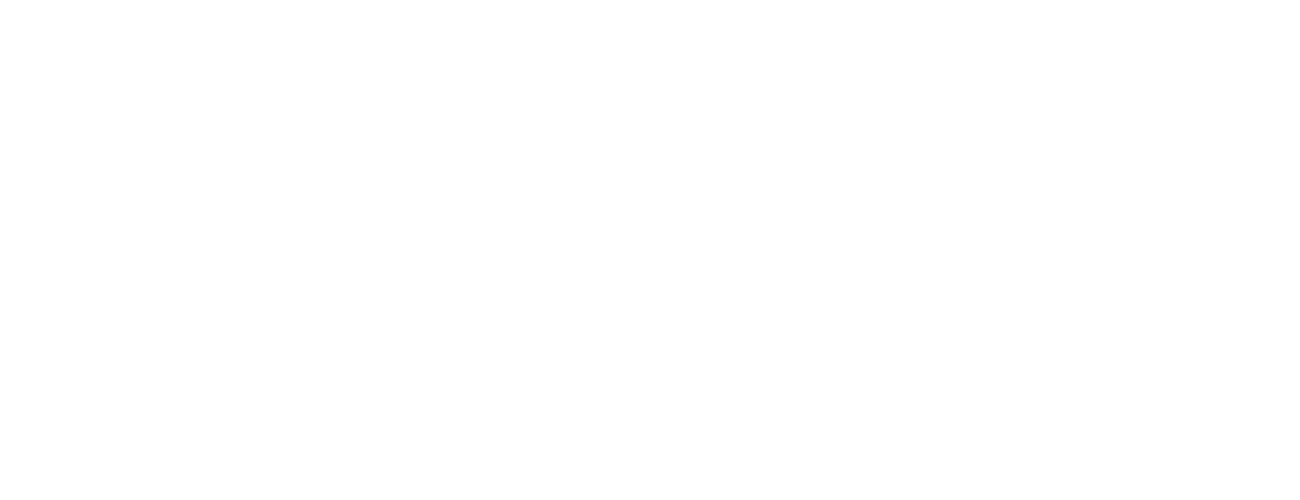

In [61]:
filename = "respondent-education_work_exp-data-kaggle-survey-2018.svg"
show_kaggle_demographic_data(filename)

In [62]:
mult_choices['What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice'].value_counts()

Local or hosted development environments (RStudio, JupyterLab, etc.)    9554
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       3928
Other                                                                   1784
Advanced statistical software (SPSS, SAS, etc.)                         1447
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1352
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    1133
Name: What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice, dtype: int64

In [63]:
def melt_data(df, col_fixed, col_to_pivot, new_col):
    """
    Convert from wide to long format
    Args: df - A Pandas dataframe
          col_fixed - A list of columns to pivot the data on
          col_to_pivot - A list of columns to change from wide to long
          new_col - A string containing the new column name
    Returns - A melted df
    """
    return pd.melt(df, id_vars=col_fixed, value_vars=col_to_pivot).drop('variable', axis=1).rename(columns={'value': new_col}).dropna()

In [64]:
queries = ['Do you consider yourself to be a data scientist?',
          'Industry'
          ] + activity_queries
colnames = ['are_you_a_ds', 'industry', 'analyze_data',
            'build_run_ml_services', 
                                                           'build_run_infra_services',
                                                          'build_run_prototype',
                                                          'research_in_ml',
                                                          'none_of_these']
other_industry = 'Other industry'
industry_activities = data_for_sankey(mult_choices, 
                queries, 
                colnames,
                [('analyze_data', 'Analyze and understand data to influence product or business decisions', 'Analyze data'),
('build_run_ml_services', 'Build and/or run a machine learning service that operationally improves my product or workflows', 'Build run ML services'),
('build_run_infra_services', 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Build run infra services'),
('build_run_prototype',  'Build prototypes to explore applying machine learning to new areas', 'Build run prototype'),
('research_in_ml', 'Do research that advances the state of the art of machine learning', 'Research in ML'),
('none_of_these', 'None of these activities are an important part of my role at work', 'None of these')],
                [('industry', top5_industries, other_industry)],
                ['are_you_a_ds'], True, True, True, True)                             

In [65]:
industry_activities_melted = melt_data(industry_activities, ['are_you_a_ds', 'industry'], 
        ['analyze_data', 
                                                           'build_run_ml_services', 
                                                           'build_run_infra_services',
                                                          'build_run_prototype',
                                                          'research_in_ml',
                                                          'none_of_these'],
         'activities')

In [66]:
industry_activities_melted.to_csv(os.path.join(d3_path, 'kaggle_survey_industry_and_activities_data.csv'), index=False)

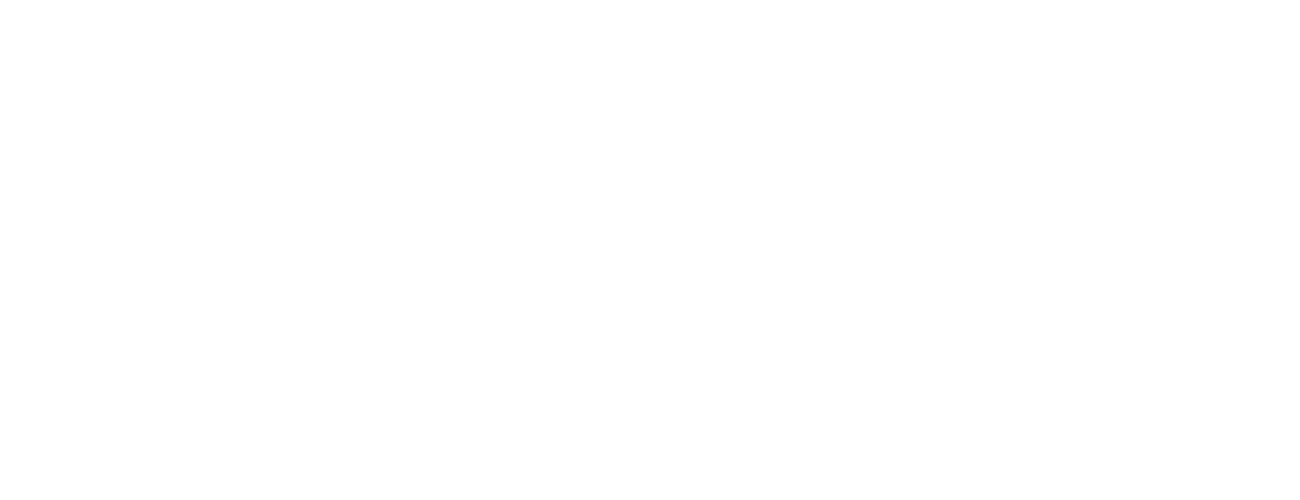

In [67]:
filename = "respondent-industry_activity-data-kaggle-survey-2018.svg"
show_kaggle_demographic_data(filename)

In [68]:
#ds_activities[(ds_activities['analyze_data'].isnull()) & (ds_activities['build_run_ml_services'].isnull()) & (ds_activities['build_run_infra_services'].isnull()) & (ds_activities['build_run_prototype'].isnull()) & (ds_activities['research_in_ml'].isnull())]

In [69]:
# ds_activities[((ds_activities['analyze_data'].notnull()) | 
#                (ds_activities['build_run_ml_services'].notnull()) | 
#                (ds_activities['build_run_infra_services'].notnull()) | 
#                (ds_activities['build_run_prototype'].notnull()) | 
#                (ds_activities['research_in_ml'].notnull())) & 
#                (ds_activities['none_of_these'].notnull())]

In [70]:
data_queries = [s for s in mult_choices.columns if 'Which types of data' in s][:-1]
queries = ['Do you consider yourself to be a data scientist?',
           'Industry'
          ] + data_queries
colnames = ['are_you_a_ds', 'industry', 'audio_data', 'cat_data', 'genetic_data', 'geospatial_data',
            'image_data', 'numeric_data', 'sensor_data', 'tabular_data', 'text_data', 
            'time-series_data', 'video_data', 'other_data'
            ]
other_industry = 'Other industry'
industry_and_data_type = data_for_sankey(mult_choices, 
                queries, 
                colnames,
                [],
                [('industry', top5_industries, other_industry)],                          
                ['are_you_a_ds'], False, True, True, True)    

In [71]:
#any(data_type_and_work_type[['gather_data', 'clean_data', 'visualize_data', 'build_model', 'deploy_model', 'insight_gather']].sum() == 100)

In [72]:
industry_and_data_type_melted = melt_data(industry_and_data_type, ['are_you_a_ds', 'industry'], 
        ['audio_data', 'cat_data', 'genetic_data',
       'geospatial_data', 'image_data', 'numeric_data', 'sensor_data',
       'tabular_data', 'text_data', 'time-series_data', 'video_data',
       'other_data'],
         'datatypes')

In [73]:
industry_and_data_type_melted.to_csv(os.path.join(d3_path, 'kaggle_survey_industry_and_data_type.csv'), index=False)

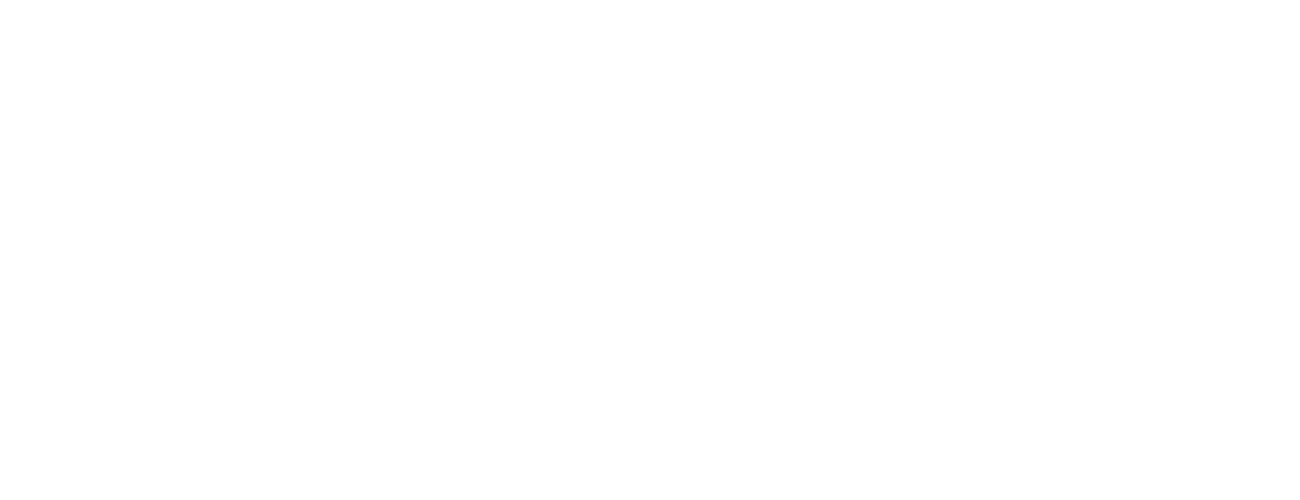

In [74]:
filename = "respondent-industry_and_datasets-data-kaggle-survey-2018.svg"
show_kaggle_demographic_data(filename)

In [75]:
typical_day_queries = [s for s in mult_choices.columns if 'During a typical data science' in s][:-1]
queries = ['Do you consider yourself to be a data scientist?',
           'Industry'
          ] + typical_day_queries
colnames = ['are_you_a_ds', 'industry', 'gather_data', 'clean_data',
            'visualize_data', 'build_model', 'deploy_model', 'insight_gather'
            ]
other_industry = 'Other industry'
industry_and_task_type = data_for_sankey(mult_choices, 
                queries, 
                colnames,
                [],
                [('industry', top5_industries, other_industry)],                          
                ['are_you_a_ds'], False, True, True, True)   

In [76]:
def bin_data(df, col2bin, bins, labels):
    """
    Bin continuous data
    Args: df - A Pandas df
          col2bin - A string containing the column to bin 
          bins - An integer
          labels - A list of categories
    Returns - A Series of binned values   
    """
    return pd.cut(df[col2bin], bins, labels=labels)

In [77]:
industry_and_task_type.head()

,are_you_a_ds,industry,gather_data,clean_data,visualize_data,build_model,deploy_model,insight_gather
0,Maybe,Other industry,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Other industry,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,I am a student,2.0,3.0,20.0,50.0,20.0,0.0
3,Yes,Other industry,20.0,25.0,15.0,10.0,10.0,20.0
4,Maybe,I am a student,10.0,10.0,20.0,10.0,20.0,23.0


In [78]:
cols = ['gather_data', 'clean_data', 'visualize_data', 'build_model', 'deploy_model', 'insight_gather']
labels = ['<=10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%']
for col in cols:
    industry_and_task_type[col] = bin_data(industry_and_task_type, col, 10, labels)

In [79]:
# Anybody who spends more than 50% of their time on any activity is grouped into the 'Other' category
# this is for the Sankey chart
amount_wrk = ['<=10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%']
for col in cols:
    industry_and_task_type[col] = industry_and_task_type[col].dropna().apply(lambda x: '50%+' if x not in amount_wrk else x)

In [80]:
industry_and_task_type_melted = melt_data(industry_and_task_type, ['are_you_a_ds', 'industry'], 
        ['gather_data', 'clean_data', 'visualize_data',
       'build_model', 'deploy_model', 'insight_gather', 'other_activity'],
         'activities')

In [81]:
industry_and_task_type_melted.to_csv(os.path.join(d3_path, 'kaggle_survey_industry_and_task_type.csv'), index=False)

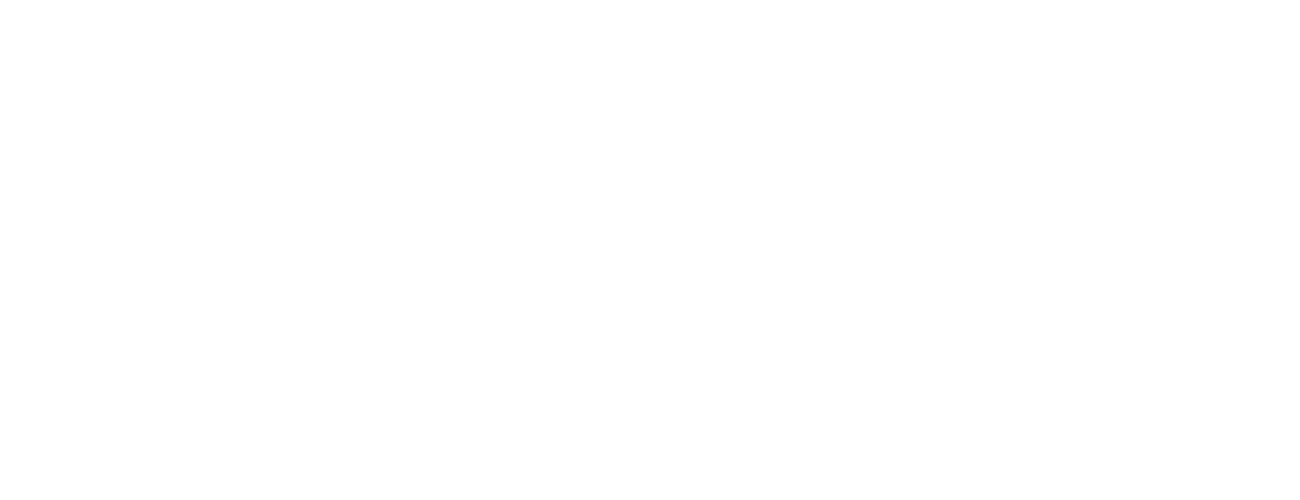

In [82]:
filename = "respondent-industry_and_datasets-data-kaggle-survey-2018.svg"
show_kaggle_demographic_data(filename)

<b>For those who claim to be Data scientists, create heatmap of the various Datasets they use at work</b>

In [83]:
cols = ['Do you consider yourself to be a data scientist?'] + data_queries
new_names = ['are_you_a_ds', 'audio_data', 'cat_data', 'genetic_data', 'geospatial_data',
            'image_data', 'numeric_data', 'sensor_data', 'tabular_data', 'text_data', 
            'time-series_data', 'video_data', 'other_data']
hm = mult_choices[cols].rename(columns=dict(zip(cols, new_names)))
hm['dummy'] = np.arange(len(hm))
hm['are_you_a_ds'] = hm['are_you_a_ds'].replace('Definitely yes', 'Yes')
hm['are_you_a_ds'] = hm['are_you_a_ds'].replace('Probably yes', 'Yes')
hm['are_you_a_ds'] = hm['are_you_a_ds'].replace('Probably not', 'No')
hm['are_you_a_ds'] = hm['are_you_a_ds'].replace('Definitely not', 'No')
df = pd.DataFrame()
for col in new_names[1:]:
    tmp = hm.groupby(['are_you_a_ds', col])['dummy'].size().reset_index()
    tmp.columns = ['are_you_a_ds', 'data_type', 'count']
    df = pd.concat([df, tmp])
hm = df.copy(deep=True)
hm = hm.merge(df.groupby('data_type').sum().reset_index().rename(columns={'count': 'total'}), on='data_type')
hm['pcnt'] = np.round(100 * hm['count']/hm['total'])
hm = hm[['are_you_a_ds', 'data_type', 'pcnt']]

In [84]:
r = pd.pivot_table(hm, columns=['are_you_a_ds'], index='data_type', values='pcnt')

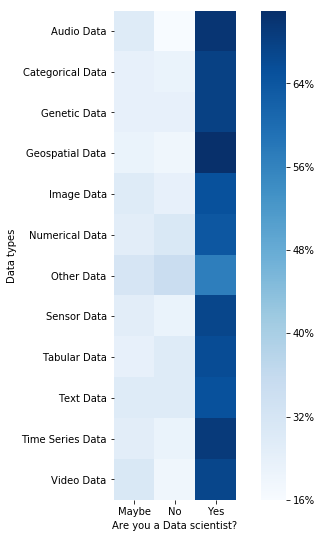

In [85]:
plt.figure(figsize=(9, 9))
ax = sns.heatmap(r, cmap="Blues", square=True)
# cbar = ax.figure.colorbar(ax.collections[0])
# https://stackoverflow.com/questions/34820239/seaborn-heatmap-colorbar-label-as-percentage
cbar = ax.collections[0].colorbar
bar_ticks = cbar.get_ticks()
cbar.set_ticks(bar_ticks)
cbar.set_ticklabels(['16%', '32%', '40%', '48%', '56%', '64%'])
plt.ylabel('Data types')
plt.xlabel('Are you a Data scientist?')
plt.show()
img_path = r'./img'
# https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file
ax.figure.savefig(os.path.join(img_path, 'kaggle_datascientist_vs_data_type.png'), bbox_inches='tight')

<b>For those who claim to be Data scientists, plot histogram of their various activities performed at work</b>

In [86]:
typical_day_queries = [s for s in mult_choices.columns if 'During a typical data science' in s][:-1]
queries = ['Do you consider yourself to be a data scientist?',
          ] + typical_day_queries
colnames = ['are_you_a_ds', 'industry', 'gather_data', 'clean_data',
            'visualize_data', 'build_model', 'deploy_model', 'insight_gather']
a = mult_choices[(mult_choices['Do you consider yourself to be a data scientist?'] == 'Definitely yes') | 
                (mult_choices['Do you consider yourself to be a data scientist?'] == 'Probably yes')][queries] 
col_remap = dict(zip(queries, ['are_you_a_ds', 'Gather data', 'Clean data', 'Visualize data', 'Build model', 
                  'Deploy model to production', 'Find insights and communicate with stakeholders']))
a.rename(columns=col_remap, inplace=True)

In [87]:
a.head()

,are_you_a_ds,Gather data,Clean data,Visualize data,Build model,Deploy model to production,Find insights and communicate with stakeholders
2,Definitely yes,2.0,3.0,20.0,50.0,20.0,0.0
3,Probably yes,20.0,25.0,15.0,10.0,10.0,20.0
13,Probably yes,15.0,10.0,15.0,25.0,0.0,35.0
16,Definitely yes,20.0,15.0,20.0,30.0,10.0,5.0
18,Definitely yes,15.0,20.0,15.0,20.0,10.0,20.0


In [101]:
plt.figure(figsize=(20,20))
length = len(a.columns[1:])
for col, j in enumerate(a.columns[1:]):
    axes = plt.subplot((length/2), 2, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    a[col].hist(bins=10, edgecolor='black')
    plt.axvline(a[col].astype('float').mean(), linestyle='dashed', color='r')
    axes.xaxis.set_major_formatter(mtick.PercentFormatter())
    plt.title(col)
    plt.grid(False)
    plt.ylabel('Number of respondents')
    plt.xlabel('Time spent')
# plt.axis('off')
img_path = r'./img'
plt.savefig(os.path.join(img_path, 'kaggle_datascientist_vs_activities.png'), bbox_inches='tight')
plt.show()

TypeError: Can't convert 'int' object to str implicitly

<Figure size 1440x1440 with 0 Axes>

<b>Create crosstab of languages used vs recommended languages for chord diagram</b>

In [89]:
lang = pd.DataFrame()
lang['language_used'] = mult_choices['What specific programming language do you use most often? - Selected Choice']
lang['recommended_language'] = mult_choices['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice']

In [90]:
grp_count = lang.groupby(['language_used', 'recommended_language']).size().reset_index().rename(columns={0: 'count'})

In [91]:
top6_languages_used = ['Python', 'R', 'SQL', 'Java', 'C/C++', 'MATLAB']
top6_recommended_languages = ['Python', 'R', 'SQL', 'C++', 'Java', 'MATLAB']
grp_count.dropna(inplace=True)
grp_count['language_used'] = grp_count['language_used'].apply(lambda x: x if x in top6_languages_used else 'Other languages')
grp_count['recommended_language'] = grp_count['recommended_language'].apply(lambda x: x if x in top6_recommended_languages else 'Other languages')

In [92]:
lang_pct = 100 * pd.crosstab(grp_count['language_used'], columns=grp_count['recommended_language'], values=grp_count['count'], aggfunc='sum', 
           normalize='index', margins=True)

In [93]:
d3_input = r'./d3_input'
lang_pct.to_csv(os.path.join(d3_input, 'crosstab_languages_used_vs_recommended_languages.csv'), index=False)

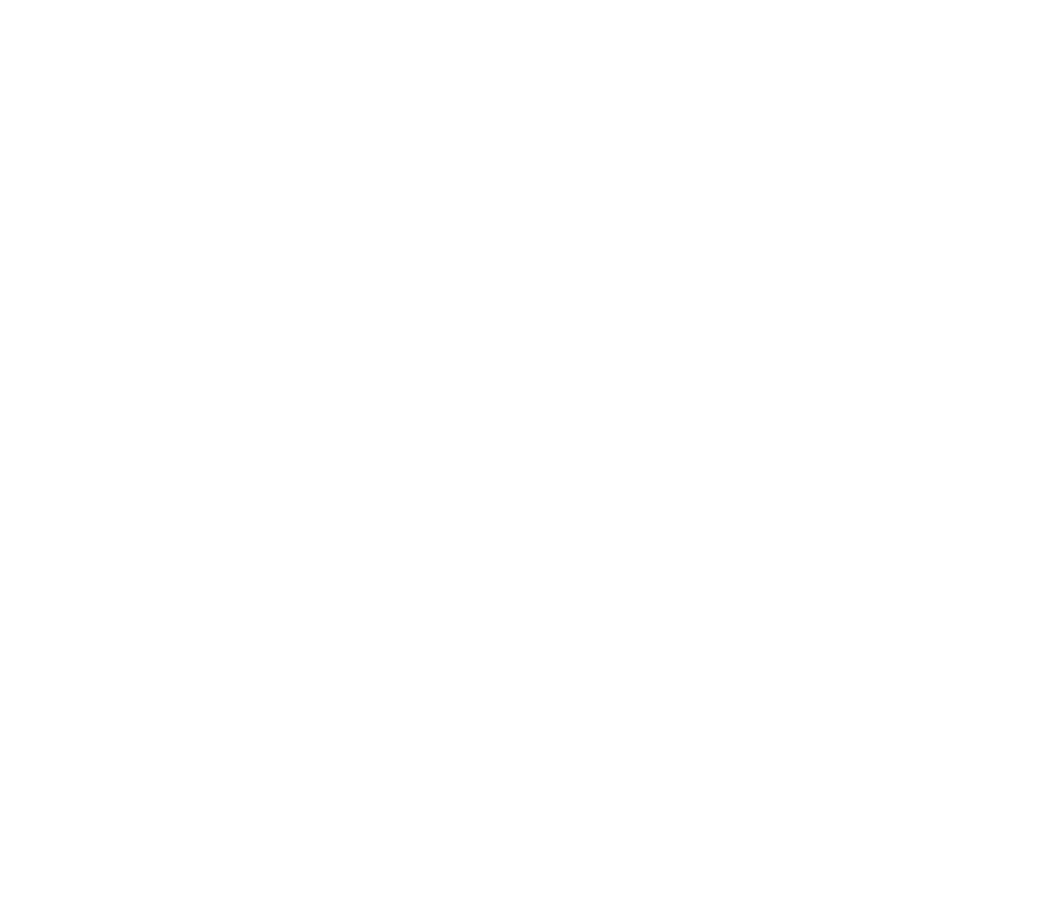

In [94]:
filename = "kaggle_chord_diagram_languages_used_vs_recommended_languages.svg"
show_kaggle_demographic_data(filename)